# Credit Card Users Churn Prediction 

### Description

### Objective

### Questions

Questions: 
1) What is the best possible model to predict a person who would churn or not?
2) What are the most significant variables at the model?

### Data Dictionar

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


In [2]:
data= pd.read_csv("BankChurners.csv")

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [4]:
df=data.copy()

In [5]:
print(f"there are {df.shape[0]} rows and {df.shape[1]} columns")

there are 10127 rows and 21 columns


In [6]:
df.isnull().sum() #there are missing values on the Education_Level and Marital_Status columns

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [7]:
df.duplicated().sum() #there is no duplicated rows on the data set

0

In [8]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [9]:
df.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                10127.000    NaN                NaN   NaN   
Attrition_Flag               10127      2  Existing Customer  8500   
Customer_Age             10127.000    NaN                NaN   NaN   
Gender                       10127      2                  F  5358   
Dependent_count          10127.000    NaN                NaN   NaN   
Education_Level               8608      6           Graduate  3128   
Marital_Status                9378      3            Married  4687   
Income_Category              10127      6     Less than $40K  3561   
Card_Category                10127      4               Blue  9436   
Months_on_book           10127.000    NaN                NaN   NaN   
Total_Relationship_Count 10127.000    NaN                NaN   NaN   
Months_Inactive_12_mon   10127.000    NaN                NaN   NaN   
Contacts_Count_12_mon    10127.000    NaN                NaN   NaN   
Credit_Limit             10127.000    NaN                NaN   NaN   
Total_Revolving_Bal      10127.000    NaN                NaN   NaN   
Avg_Open_To_Buy          10127.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     10127.000    NaN                NaN   NaN   
Total_Trans_Amt          10127.000    NaN                NaN   NaN   
Total_Trans_Ct           10127.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      10127.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    10127.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                739177606.334 36903783.450 708082083.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.326        8.017        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.346        1.299         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  35.928        7.986        13.000   
Total_Relationship_Count         3.813        1.554         1.000   
Months_Inactive_12_mon           2.341        1.011         0.000   
Contacts_Count_12_mon            2.455        1.106         0.000   
Credit_Limit                  8631.954     9088.777      1438.300   
Total_Revolving_Bal           1162.814      814.987         0.000   
Avg_Open_To_Buy               7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1             0.760        0.219         0.000   
Total_Trans_Amt               4404.086     3397.129       510.000   
Total_Trans_Ct                  64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1              0.712        0.238         0.000   
Avg_Utilization_Ratio            0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        46.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  1.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000       

### Observation

### Data Prosessing

In [10]:
df=df.drop(["CLIENTNUM"], axis=1)

In [11]:
list_str = list(df.select_dtypes(include=['object']).columns)
list_str

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [12]:
cat_list=["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category","Dependent_count","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon"]

In [13]:
for column in cat_list:
    df[column]=df[column].astype("category")

In [14]:
df.dtypes # recheck the data types

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count             category
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count    category
Months_Inactive_12_mon      category
Contacts_Count_12_mon       category
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

In [15]:
for column in cat_list:
    print(df[column].value_counts())
    print("#"*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
##################################################
F    5358
M    4769
Name: Gender, dtype: int64
##################################################
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
##################################################
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
##################################################
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
##################################################
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
##################################################
3    2732
2    2655
1    1838


#### Observation

### EDA

#### Univariate Analysis¶

In [16]:
def labeled_barplot(data, feature, percentage=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 6))
    else:
        plt.figure(figsize=(n + 1, 6))

    plt.xticks(rotation=45, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if percentage == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()  

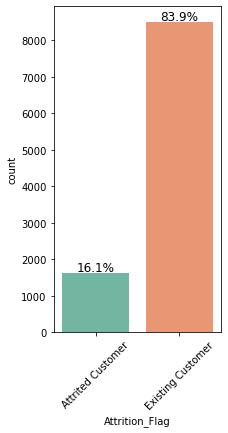

None
################################################################################


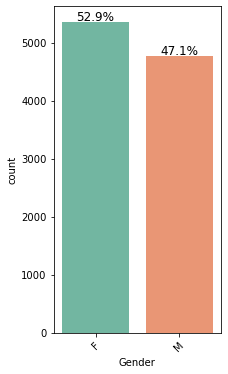

None
################################################################################


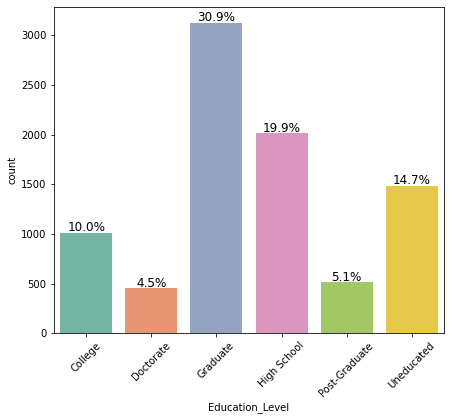

None
################################################################################


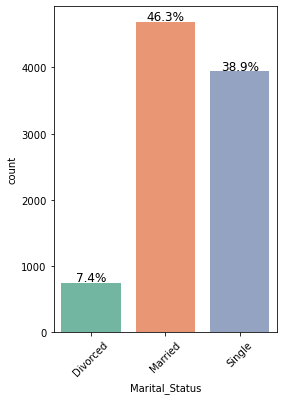

None
################################################################################


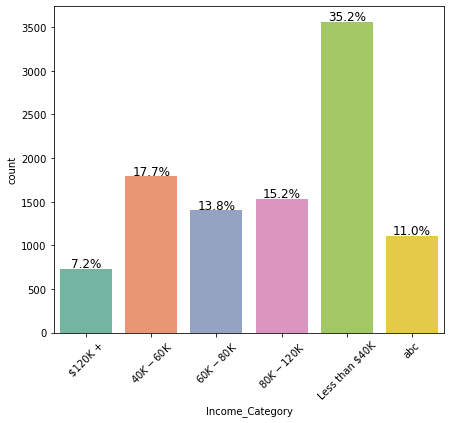

None
################################################################################


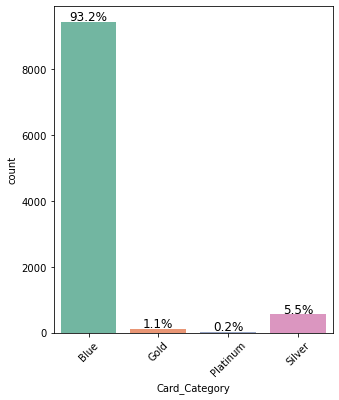

None
################################################################################


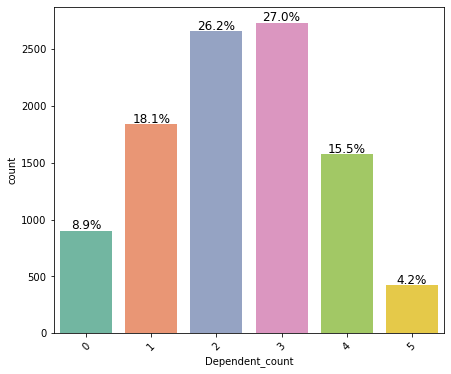

None
################################################################################


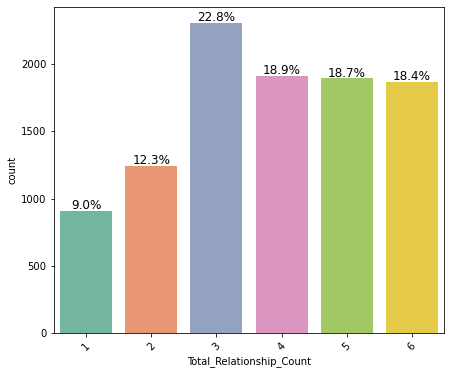

None
################################################################################


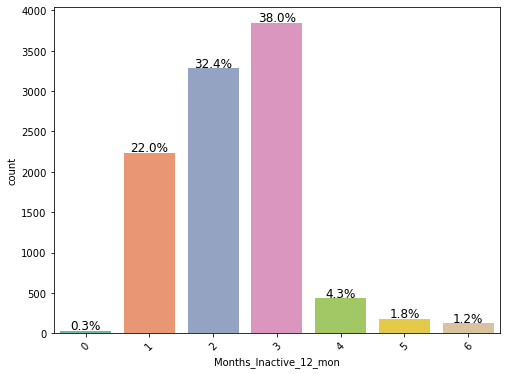

None
################################################################################


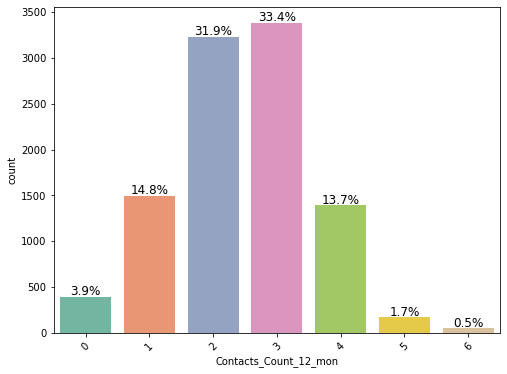

None
################################################################################


In [17]:
for feature in cat_list:
    print(labeled_barplot(df, feature, percentage=True))
    print("#"*80)

In [18]:
def boxplot_hitogram(data, feature, figsize=(10, 5), kde=True, bins=20):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellowgreen"
    ) 
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="pink"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="lime", linestyle="-"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="--"
    ) 

In [19]:
num_list= list(df.select_dtypes(include=['float64',"int64"]).columns)
num_list

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [20]:
df.describe().T

count     mean      std      min      25%      50%  \
Customer_Age          10127.000   46.326    8.017   26.000   41.000   46.000   
Months_on_book        10127.000   35.928    7.986   13.000   31.000   36.000   
Credit_Limit          10127.000 8631.954 9088.777 1438.300 2555.000 4549.000   
Total_Revolving_Bal   10127.000 1162.814  814.987    0.000  359.000 1276.000   
Avg_Open_To_Buy       10127.000 7469.140 9090.685    3.000 1324.500 3474.000   
Total_Amt_Chng_Q4_Q1  10127.000    0.760    0.219    0.000    0.631    0.736   
Total_Trans_Amt       10127.000 4404.086 3397.129  510.000 2155.500 3899.000   
Total_Trans_Ct        10127.000   64.859   23.473   10.000   45.000   67.000   
Total_Ct_Chng_Q4_Q1   10127.000    0.712    0.238    0.000    0.582    0.702   
Avg_Utilization_Ratio 10127.000    0.275    0.276    0.000    0.023    0.176   

                            75%       max  
Customer_Age             52.000    73.000  
Months_on_book           40.000    56.000  
Credit_Limit          11067.500 34516.000  
Total_Revolving_Bal    1784.000  2517.000  
Avg_Open_To_Buy        9859.000 34516.000  
Total_Amt_Chng_Q4_Q1      0.859     3.397  
Total_Trans_Amt        4741.000 18484.000  
Total_Trans_Ct           81.000   139.000  
Total_Ct_Chng_Q4_Q1       0.818     3.714  
Avg_Utilization_Ratio     0.503     0.999

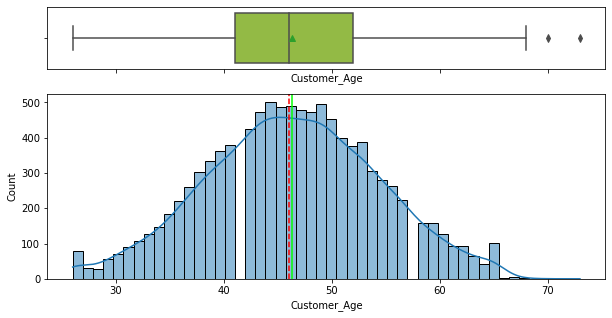

In [21]:
boxplot_hitogram(df, "Customer_Age", figsize=(10, 5), kde=True, bins=50)

Customer ages ranged from 26 to 73, and the mean value is 46.3 and normally distributed. Mean and median scores are almost the same. There are outliers. 

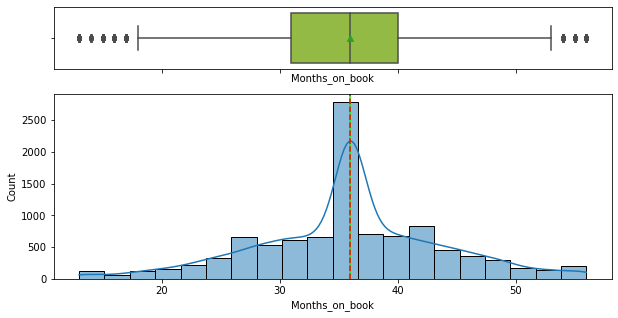

In [22]:
boxplot_hitogram(df, "Months_on_book", figsize=(10, 5), kde=True, bins=20)

The mean and median scores of the Months_on_book variable are the same. There are outliers.

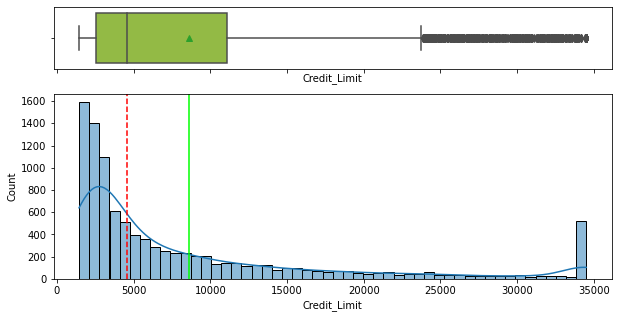

In [23]:
boxplot_hitogram(df, "Credit_Limit", figsize=(10, 5), kde=True, bins=50)

Credit_Limit is right skewed. There are outliers.Mean score is 8631.9 

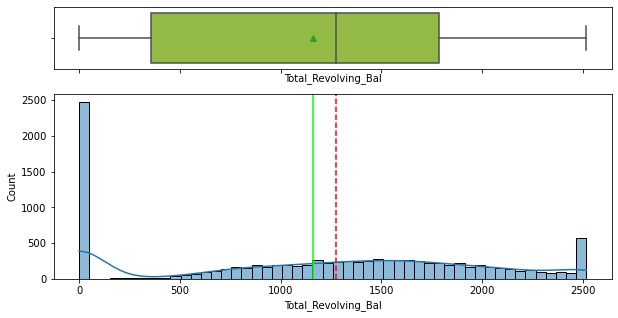

In [24]:
boxplot_hitogram(df, "Total_Revolving_Bal", figsize=(10, 5), kde=True, bins=50)

Total_Revolving_Bal is right skewed. Box plot shows that there is no outliers.

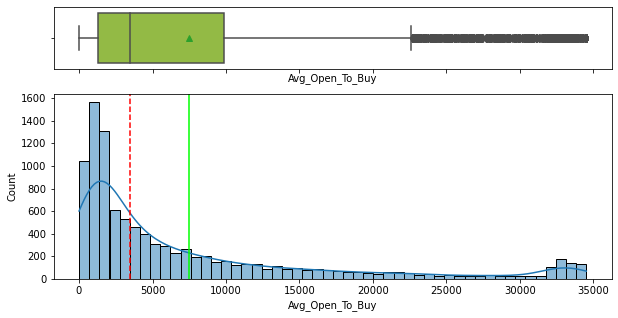

In [25]:
boxplot_hitogram(df, "Avg_Open_To_Buy", figsize=(10, 5), kde=True, bins=50)

Avg_Open_To_Buy is skewed right and there are outliers.

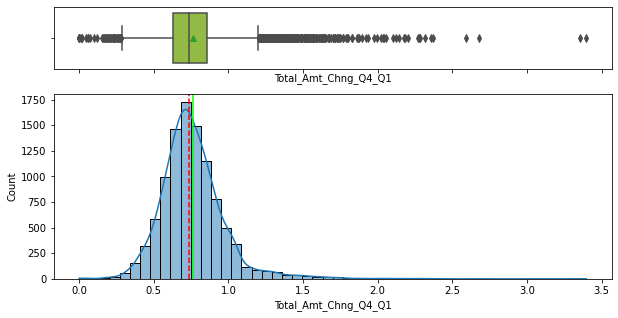

In [26]:
boxplot_hitogram(df, "Total_Amt_Chng_Q4_Q1", figsize=(10, 5), kde=True, bins=50)

The mean of the Total_Amt_Chng_Q4_Q1 variable is 7469.1 and the mean and median scores are almost same. There are many outliers.

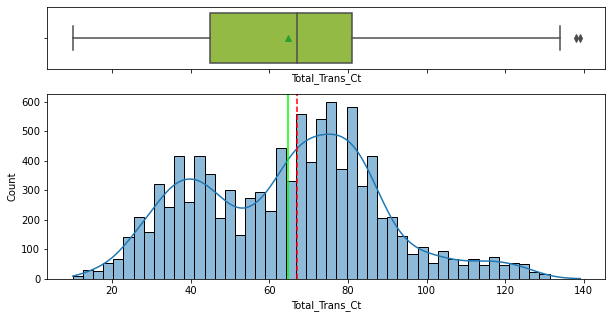

In [27]:
boxplot_hitogram(df, "Total_Trans_Ct", figsize=(10, 5), kde=True, bins=50)

Total_Trans_Ct is not normally distributed; there are two peaks. There are outliers.

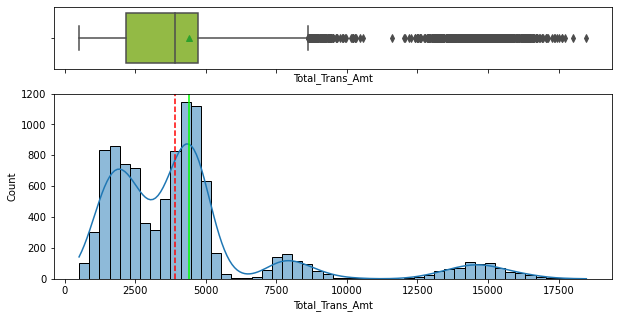

In [28]:
boxplot_hitogram(df, "Total_Trans_Amt", figsize=(10, 5), kde=True, bins=50)

Total_Trans_Amt is not normally distributed; there are peaks; It can be categorical. There are outliers.  

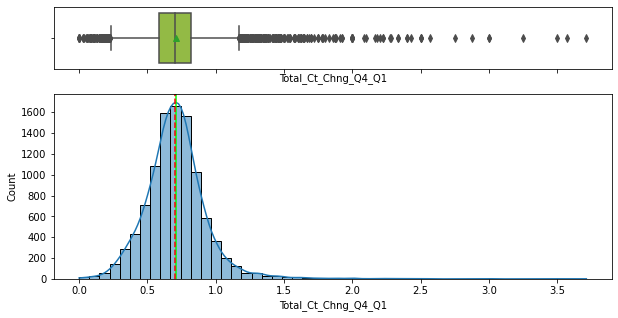

In [29]:
boxplot_hitogram(df, "Total_Ct_Chng_Q4_Q1", figsize=(10, 5), kde=True, bins=50)

Total_Ct_Chng_Q4_Q1 has outliers. It ranged from 0 to 3.714 and has 0.274 mean value.

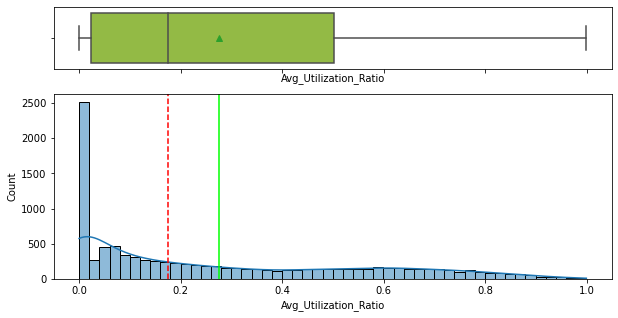

In [30]:
boxplot_hitogram(df, "Avg_Utilization_Ratio", figsize=(10, 5), kde=True, bins=50)

Avg_Utilization_Ratio is skwed right and has 0.274 mean value and ranged from 0 to 0.999.

### Bivariate Analysis

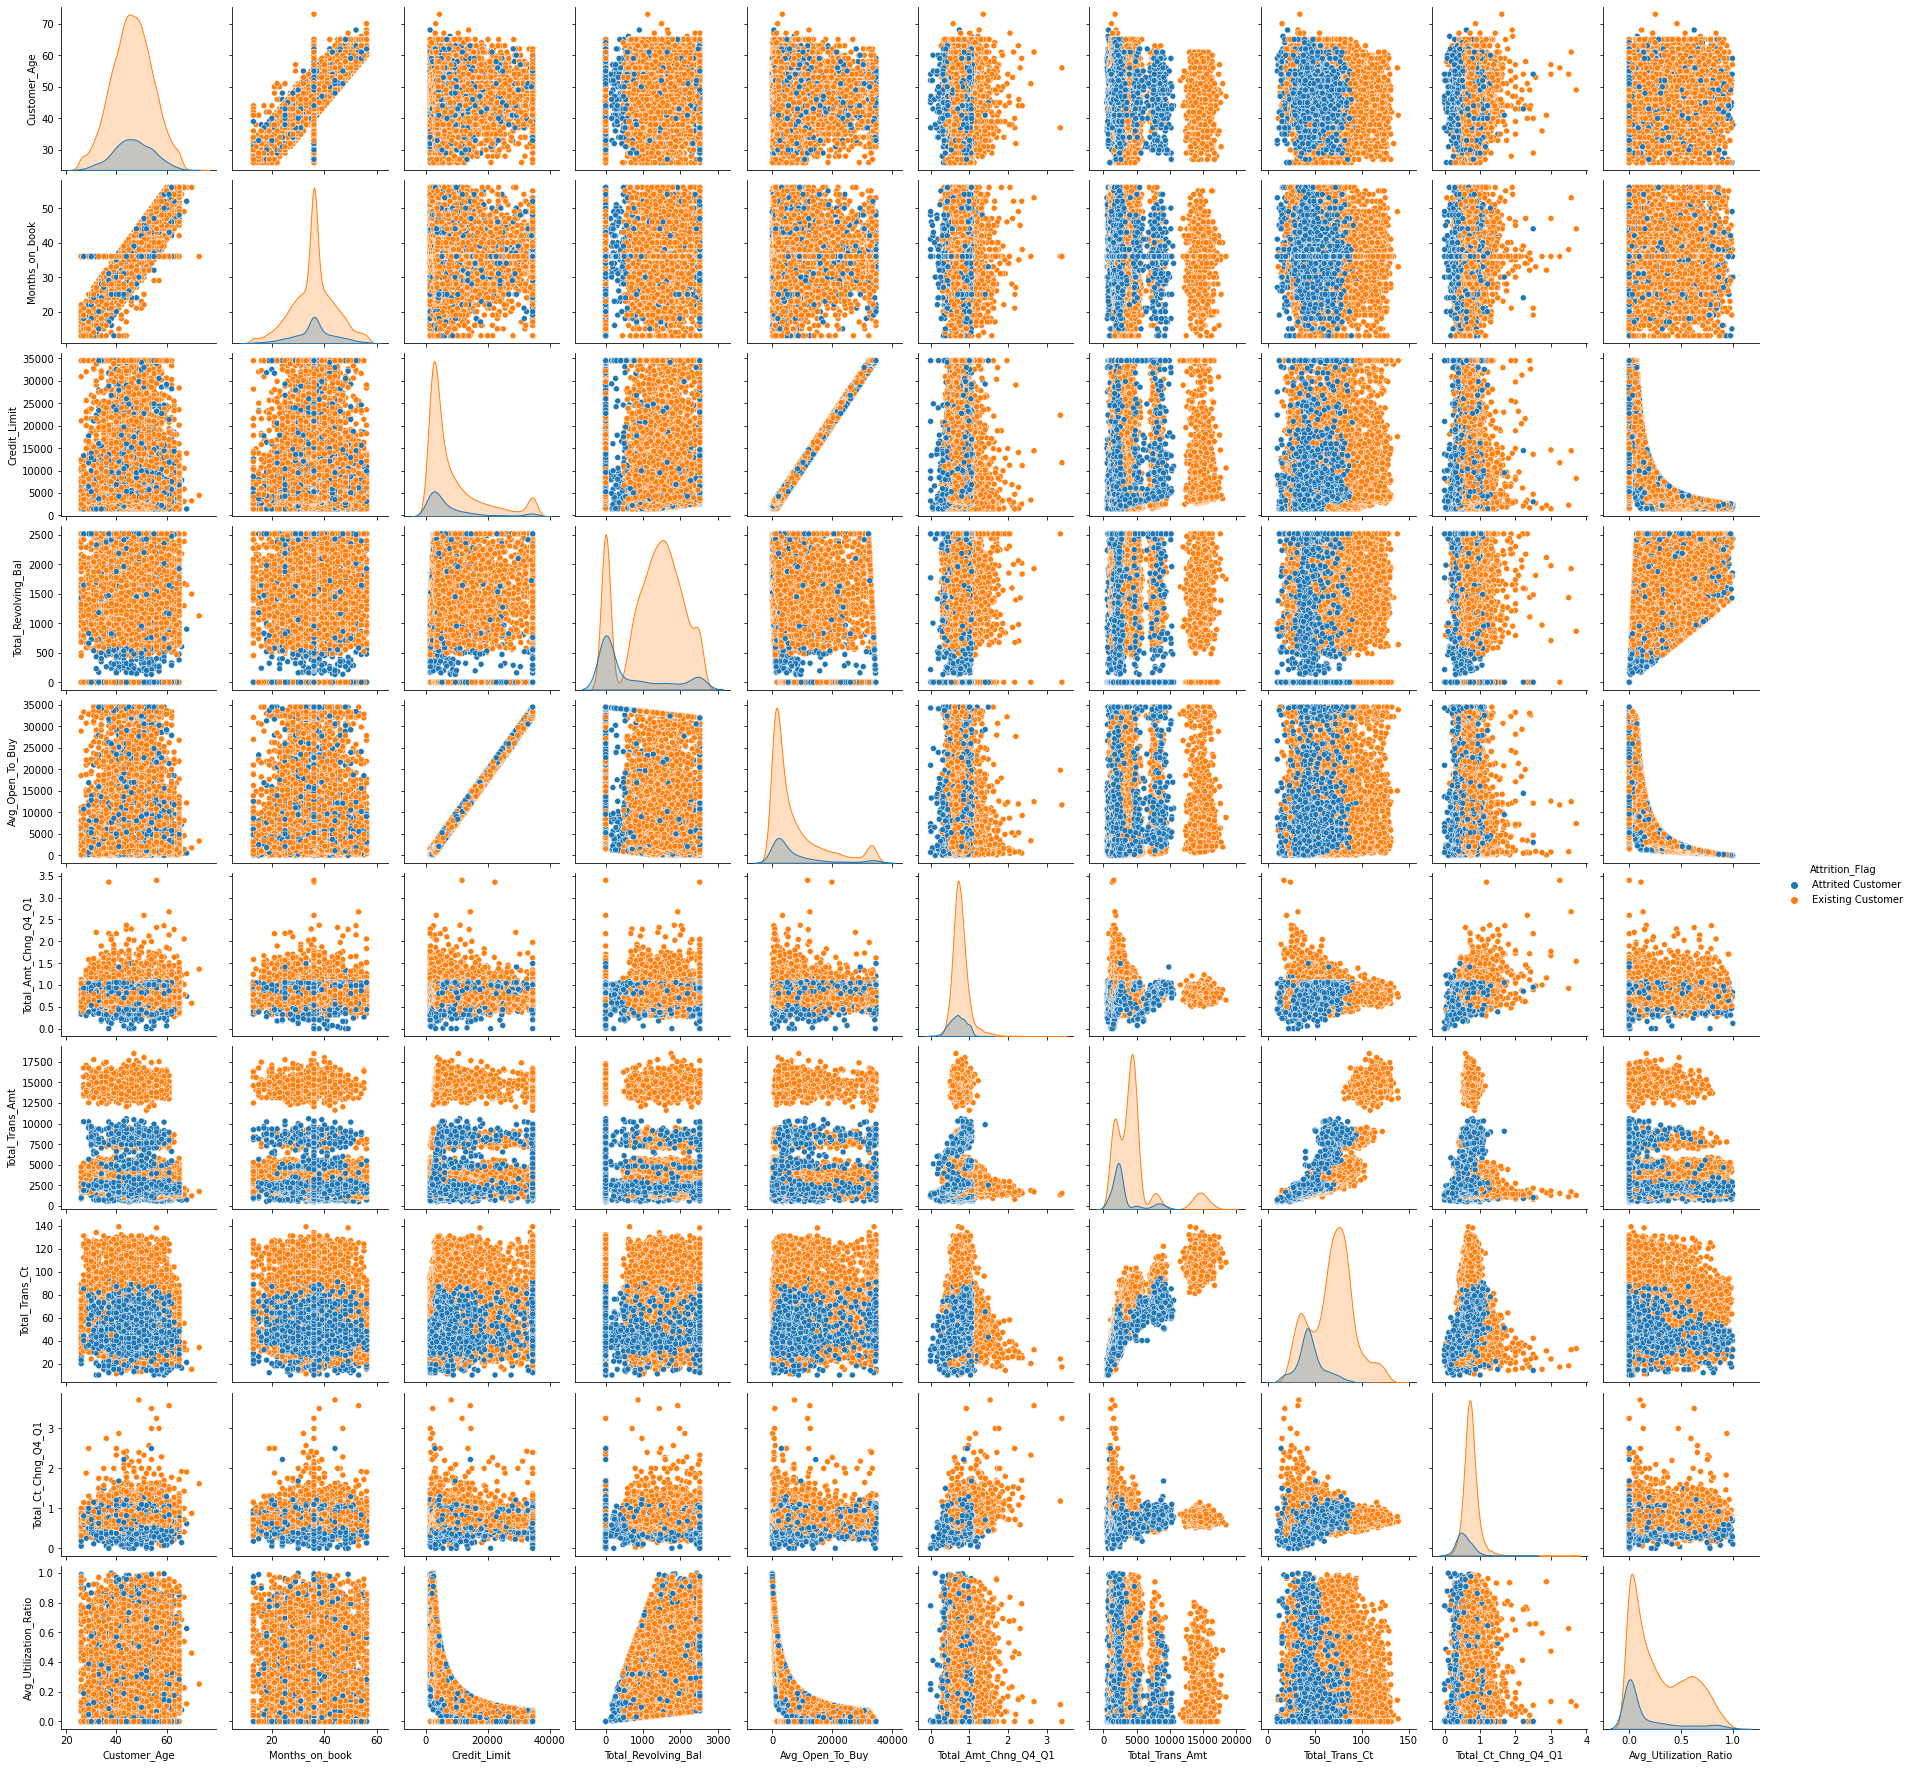

In [31]:
sns.pairplot(df, hue="Attrition_Flag")

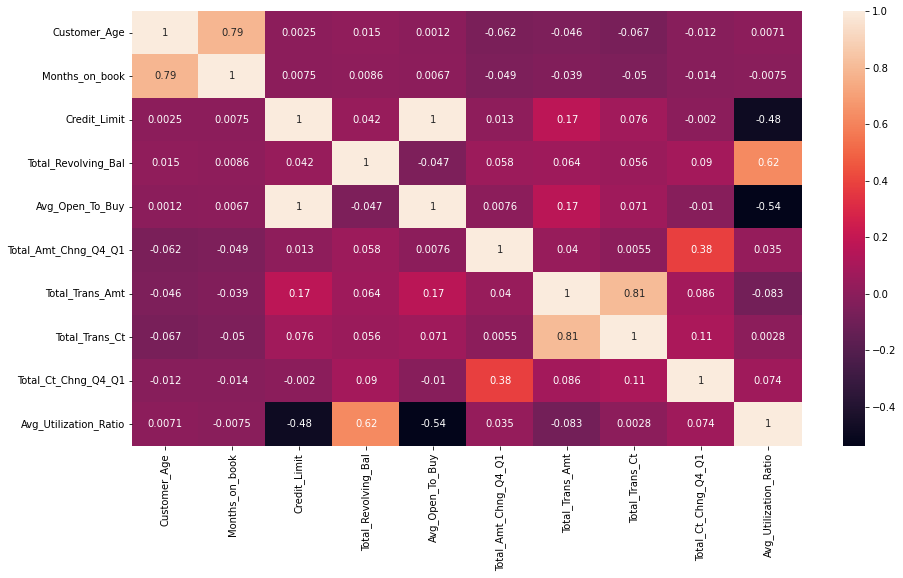

In [32]:
plt.figure(figsize=(15,8)) #There is a very high correlation between  credit_Limit and Avg_Open_To_Buy, so one of them should be dropped.
sns.heatmap(df.corr(), annot=True)


In [33]:
def stc_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("*" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
****************************************************************************************************


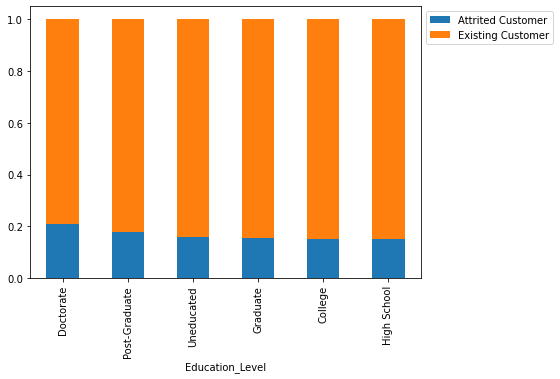

In [34]:
stc_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
****************************************************************************************************


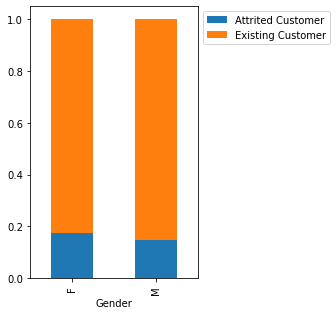

In [35]:
stc_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
****************************************************************************************************


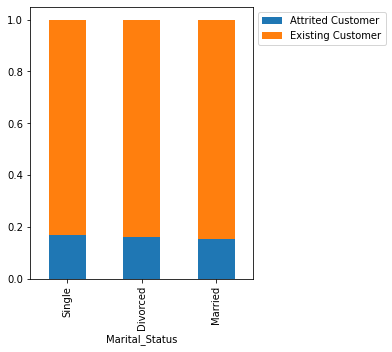

In [36]:
stc_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
****************************************************************************************************


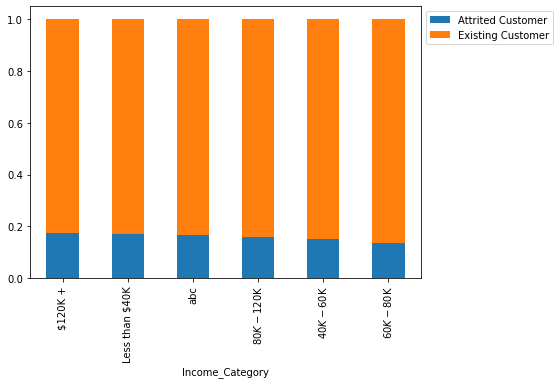

In [37]:
stc_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
****************************************************************************************************


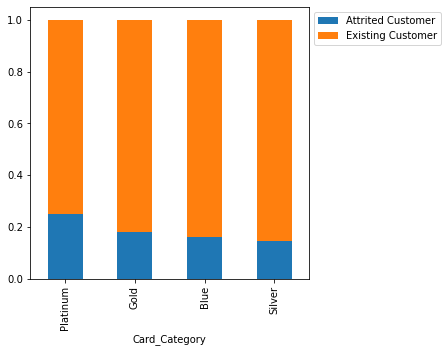

In [38]:
stc_barplot(df, "Card_Category", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
****************************************************************************************************


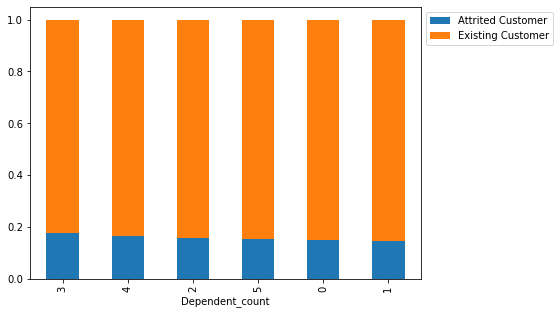

In [39]:
stc_barplot(df, "Dependent_count", "Attrition_Flag")

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
****************************************************************************************************


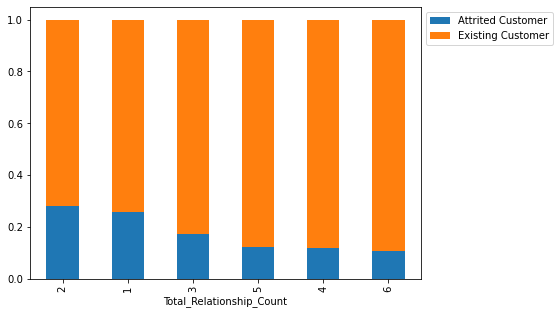

In [40]:
stc_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
****************************************************************************************************


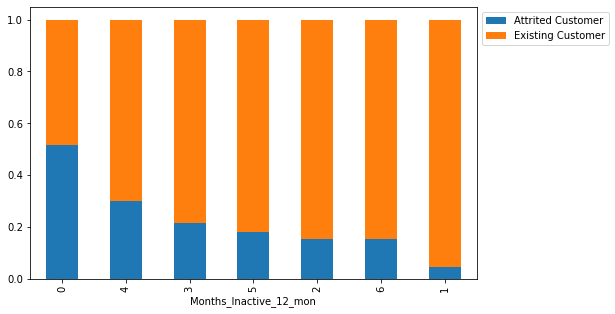

In [41]:
stc_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
****************************************************************************************************


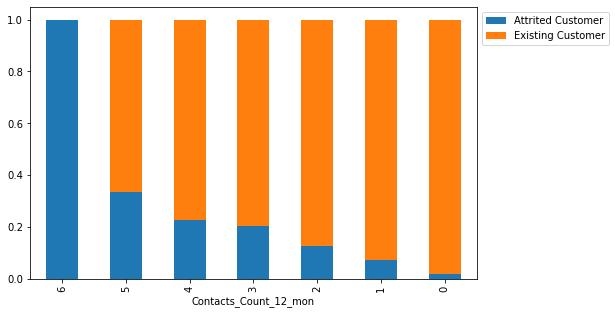

In [42]:
stc_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

##### Observation

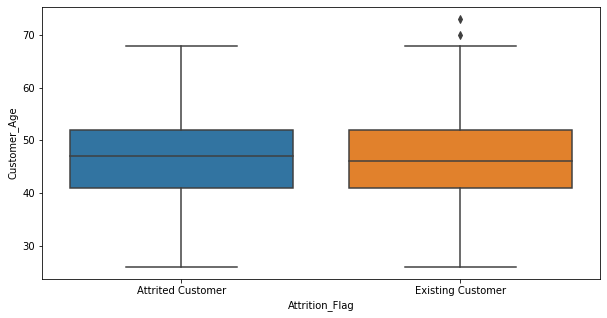

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=df, orient="vertical")

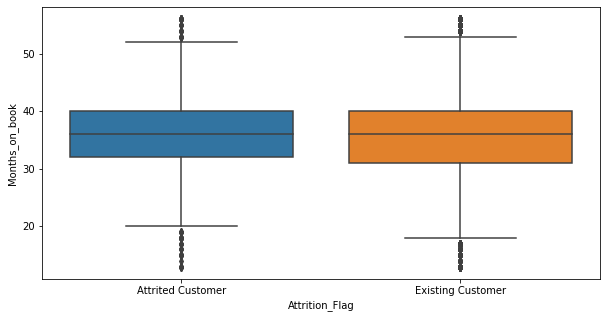

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=df, orient="vertical")

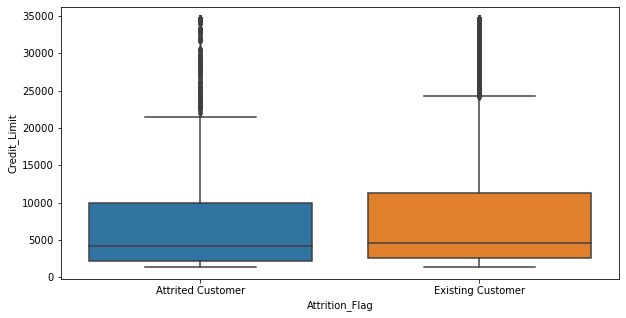

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=df, orient="vertical")

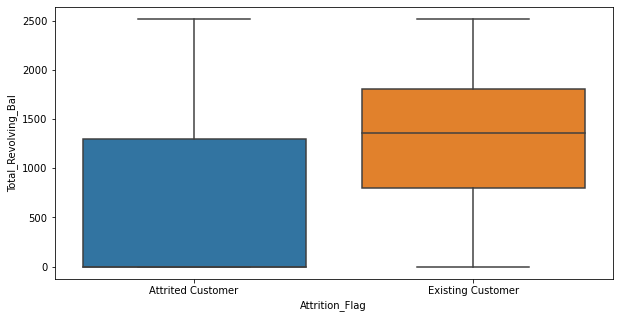

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df, orient="vertical")

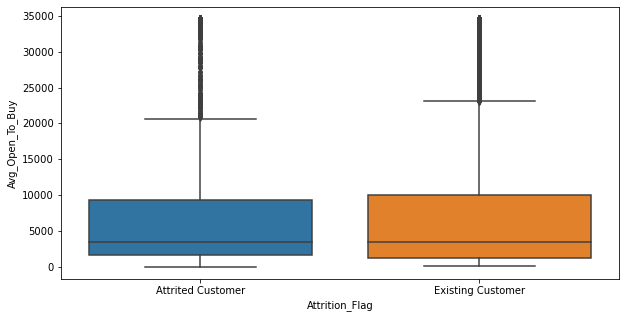

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=df, orient="vertical")

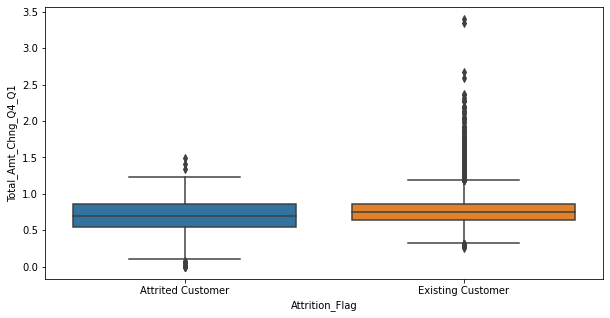

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df, orient="vertical")

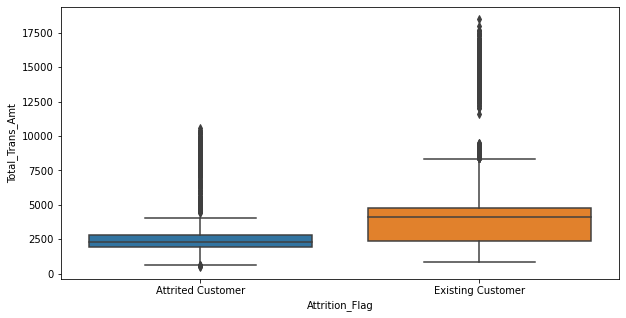

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df, orient="vertical")

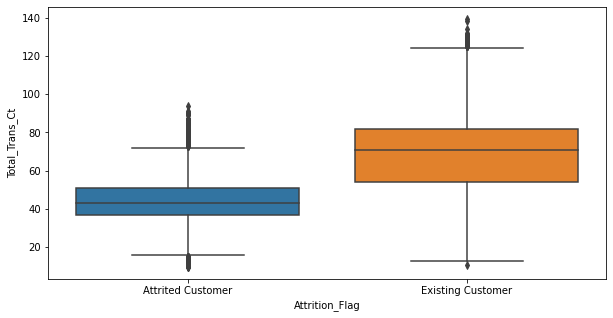

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df, orient="vertical")

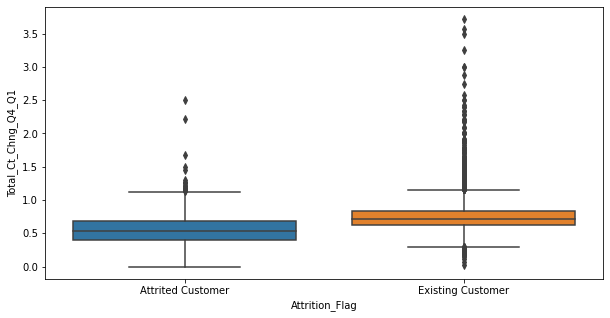

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=df, orient="vertical")

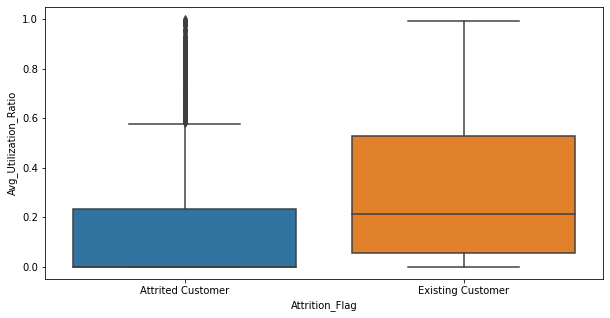

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df, orient="vertical")

##### Observation

The ages of the attrited and existing customers have similar median scores.
Attrited and existing customers' median scores of months on book are similar.
Existing customers' total revolving balance median score is higher than the attrited customers' total revolving balance median score.

### Missing Values

In [53]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [54]:
df[df["Education_Level"].isnull()]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
6      Existing Customer            51      M               4             NaN   
11     Existing Customer            65      M               1             NaN   
15     Existing Customer            44      M               4             NaN   
17     Existing Customer            41      M               3             NaN   
23     Existing Customer            47      F               4             NaN   
...                  ...           ...    ...             ...             ...   
10090  Existing Customer            36      F               3             NaN   
10094  Existing Customer            59      M               1             NaN   
10095  Existing Customer            46      M               3             NaN   
10118  Attrited Customer            50      M               1             NaN   
10123  Attrited Customer            41      M               2             NaN   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married         $120K +          Gold              46   
11           Married     $40K - $60K          Blue              54   
15               NaN    $80K - $120K          Blue              37   
17           Married    $80K - $120K          Blue              34   
23            Single  Less than $40K          Blue              36   
...              ...             ...           ...             ...   
10090        Married     $40K - $60K          Blue              22   
10094         Single     $60K - $80K          Blue              48   
10095        Married    $80K - $120K          Blue              33   
10118            NaN    $80K - $120K          Blue              36   
10123       Divorced     $40K - $60K          Blue              25   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
6                            6                      1                     3   
11                           6                      2                     3   
15                           5                      1                     2   
17                           4                      4                     1   
23                           3                      3                     2   
...                        ...                    ...                   ...   
10090                        5                      3                     3   
10094                        3                      1                     2   
10095                        4                      1                     3   
10118                        6                      3                     4   
10123                        4                      2                     3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6         34516.000                 2264        32252.000   
11         9095.000                 1587         7508.000   
15         4234.000                  972         3262.000   
17        13535.000                 1291        12244.000   
23         2492.000                 1560          932.000   
...             ...                  ...              ...   
10090     12958.000                 2273        10685.000   
10094      7288.000                    0         7288.000   
10095     34516.000                 1099        33417.000   
10118      9959.000                  952         9007.000   
10123      4277.000                 2186         2091.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6                     1.975             1330              31   
11                    1.433             1314              26   
15                    1.707             1348              27   
17                    0.653             1028              21   
23                    0.573             1126              23   
...                     ...              ...             ...   
10090                 0.608            15681              96   
10

In [55]:
df[df["Income_Category"]=="abc"]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
19     Existing Customer            45      F               2        Graduate   
28     Existing Customer            44      F               3      Uneducated   
39     Attrited Customer            66      F               0       Doctorate   
44     Existing Customer            38      F               4        Graduate   
58     Existing Customer            44      F               5        Graduate   
...                  ...           ...    ...             ...             ...   
10021  Attrited Customer            30      F               1        Graduate   
10040  Attrited Customer            50      F               3       Doctorate   
10083  Existing Customer            42      F               4      Uneducated   
10092  Attrited Customer            40      F               3        Graduate   
10119  Attrited Customer            55      F               3      Uneducated   

      Marital_Status Income_Category Card_Category  Months_on_book  \
19           Married             abc          Blue              37   
28            Single             abc          Blue              34   
39           Married             abc          Blue              56   
44            Single             abc          Blue              28   
58           Married             abc          Blue              35   
...              ...             ...           ...             ...   
10021        Married             abc          Blue              18   
10040         Single             abc          Blue              36   
10083        Married             abc          Blue              23   
10092        Married             abc          Blue              25   
10119         Single             abc          Blue              47   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
19                           6                      1                     2   
28                           5                      2                     2   
39                           5                      4                     3   
44                           2                      3                     3   
58                           4                      1                     2   
...                        ...                    ...                   ...   
10021                        4                      1                     4   
10040                        4                      3                     3   
10083                        4                      1                     2   
10092                        1                      2                     3   
10119                        4                      3                     3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
19        14470.000                 1157        13313.000   
28        10100.000                    0        10100.000   
39         7882.000                  605         7277.000   
44         9830.000                 2055         7775.000   
58         6273.000                  978         5295.000   
...             ...                  ...              ...   
10021      4377.000                 2517         1860.000   
10040      5173.000                    0         5173.000   
10083      8348.000                    0         8348.000   
10092      6888.000                 1878         5010.000   
10119     14657.000                 2517        12140.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19                    0.966             1207              21   
28                    0.525             1052              18   
39                    1.052              704              16   
44                    0.977             1042              23   
58                    2.275             1359              25   
...                     ...              ...             ...   
10021                 0.941             8759              74   
10

In [56]:
df.groupby(by=["Income_Category"])["Gender"].value_counts()

Income_Category  Gender
$120K +          M          727
$40K - $60K      F         1014
                 M          776
$60K - $80K      M         1402
$80K - $120K     M         1535
Less than $40K   F         3284
                 M          277
abc              F         1060
                 M           52
Name: Gender, dtype: int64

In [57]:
df["Income_Category"].replace({"abc":np.nan}, inplace=True)

In [58]:
df["Income_Category"].isnull().sum()

1112

In [59]:
df[df["Marital_Status"].isnull()]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
3      Existing Customer            40      F               4     High School   
7      Existing Customer            32      M               0     High School   
10     Existing Customer            42      M               5      Uneducated   
13     Existing Customer            35      M               3        Graduate   
15     Existing Customer            44      M               4             NaN   
...                  ...           ...    ...             ...             ...   
10070  Existing Customer            47      M               3     High School   
10100  Existing Customer            39      M               2        Graduate   
10101  Existing Customer            42      M               2        Graduate   
10118  Attrited Customer            50      M               1             NaN   
10125  Attrited Customer            30      M               2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
3                NaN  Less than $40K          Blue              34   
7                NaN     $60K - $80K        Silver              27   
10               NaN         $120K +          Blue              31   
13               NaN     $60K - $80K          Blue              30   
15               NaN    $80K - $120K          Blue              37   
...              ...             ...           ...             ...   
10070            NaN    $80K - $120K        Silver              40   
10100            NaN     $60K - $80K        Silver              36   
10101            NaN     $40K - $60K          Blue              30   
10118            NaN    $80K - $120K          Blue              36   
10125            NaN     $40K - $60K          Blue              36   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
3                            3                      4                     1   
7                            2                      2                     2   
10                           5                      3                     2   
13                           5                      1                     3   
15                           5                      1                     2   
...                        ...                    ...                   ...   
10070                        5                      3                     2   
10100                        4                      2                     2   
10101                        3                      2                     5   
10118                        6                      3                     4   
10125                        4                      3                     3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3          3313.000                 2517          796.000   
7         29081.000                 1396        27685.000   
10         6748.000                 1467         5281.000   
13         8547.000                 1666         6881.000   
15         4234.000                  972         3262.000   
...             ...                  ...              ...   
10070     34516.000                 1371        33145.000   
10100     29808.000                    0        29808.000   
10101      3735.000                 1723         2012.000   
10118      9959.000                  952         9007.000   
10125      5281.000                    0         5281.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3                     1.405             1171              20   
7                     2.204             1538              36   
10                    0.831             1201              42   
13                    1.163             1311              33   
15                    1.707             1348              27   
...                     ...              ...             ...   
10070                 0.691            15930             123   
10

In [60]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

There is no trend between the missing values and the other features so the missing values will be filled with mode on the Marital_Status column.

### Transformation

Some features are skewed and will be better behave on the arcsinh. np.arcsinh will be used for the transformation because some features are 0 values.

In [61]:
df1=df.copy()

In [62]:
df1.drop(columns=["Avg_Open_To_Buy"], inplace=True) #drop the Avg_Open_To_Buy because it has a very high correlation with the Credit_Limit variable

In [63]:
df1["Credit_Limit" + '_arc'] = np.arcsinh(df1["Credit_Limit"])
df1.drop("Credit_Limit", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


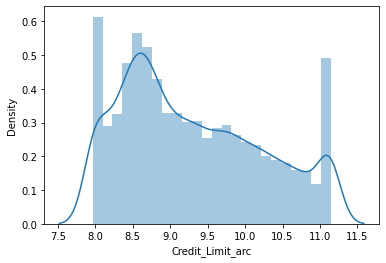

In [64]:
sns.distplot(df1["Credit_Limit_arc"])

In [65]:
df1["Total_Amt_Chng_Q4_Q1" + '_arc'] = np.arcsinh(df1["Total_Amt_Chng_Q4_Q1"])
df1.drop("Total_Amt_Chng_Q4_Q1", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


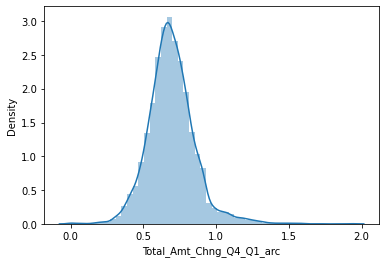

In [66]:
sns.distplot(df1["Total_Amt_Chng_Q4_Q1_arc"])

In [67]:
df1["Total_Ct_Chng_Q4_Q1" + '_arc'] = np.arcsinh(df["Total_Ct_Chng_Q4_Q1"])
df1.drop("Total_Ct_Chng_Q4_Q1", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


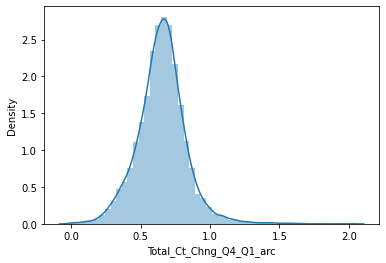

In [68]:
sns.distplot(df1["Total_Ct_Chng_Q4_Q1_arc"])

In [69]:
df1["Avg_Utilization_Ratio" + '_arc'] = np.arcsinh(df["Avg_Utilization_Ratio"])
df1.drop("Avg_Utilization_Ratio", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


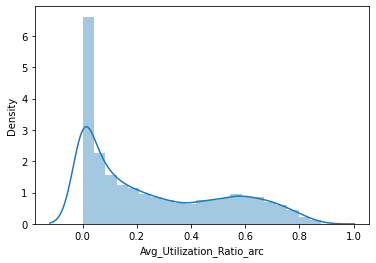

In [70]:
sns.distplot(df1["Avg_Utilization_Ratio_arc"])

### Binning

Let's bin some numerical features which have peaks. 

In [71]:
bins = [-np.inf, 50, 100, np.inf]
labels = ['<50', '50-100', '>100']

df1['Total_Trans_Ct_bins'] = pd.cut(df1['Total_Trans_Ct'], bins=bins, labels=labels, include_lowest=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


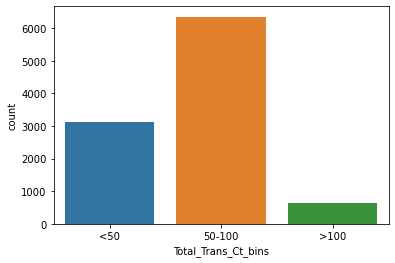

In [72]:
sns.countplot(df1['Total_Trans_Ct_bins'])

In [73]:
df1['Total_Trans_Ct_bins'].value_counts()

50-100    6350
<50       3128
>100       649
Name: Total_Trans_Ct_bins, dtype: int64

In [74]:
df1.drop(columns=["Total_Trans_Ct"], inplace=True)

In [75]:
bins = [-np.inf, 1000, 2000, np.inf]
labels = ['<1000', '1000-2000', '>2000']

df1['Total_Revolving_Bal_bins'] = pd.cut(df1['Total_Revolving_Bal'], bins=bins, labels=labels, include_lowest=True)
df1.drop(columns=["Total_Revolving_Bal"], inplace=True)

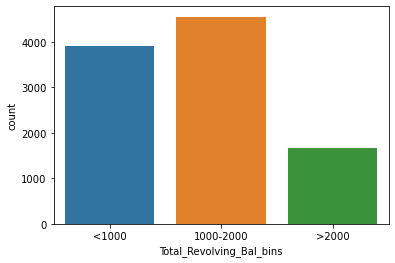

In [76]:
sns.countplot(df1['Total_Revolving_Bal_bins'])

In [77]:
df1['Total_Revolving_Bal_bins'].value_counts()

1000-2000    4549
<1000        3913
>2000        1665
Name: Total_Revolving_Bal_bins, dtype: int64

In [78]:
bins = [-np.inf, 3000,6000,9000,12000,15000, 18000, np.inf]
labels = ['<3000', '3000-6000','6000-9000','9000-12000','12000-15000','15000-18000', '>18000']

df1['Total_Trans_Amt_bins'] = pd.cut(df1['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True)
df1.drop(columns=["Total_Trans_Amt"], inplace=True)

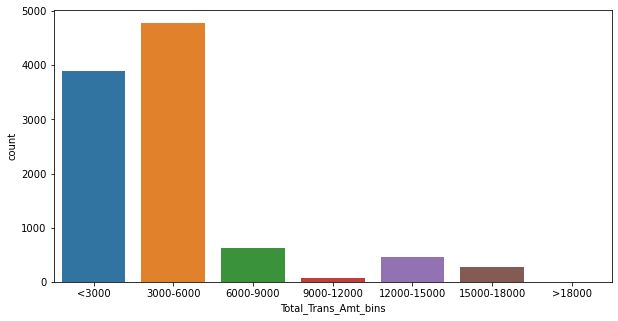

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Total_Trans_Amt_bins'])

In [80]:
df1.dtypes

Attrition_Flag               category
Customer_Age                    int64
Gender                       category
Dependent_count              category
Education_Level              category
Marital_Status               category
Income_Category                object
Card_Category                category
Months_on_book                  int64
Total_Relationship_Count     category
Months_Inactive_12_mon       category
Contacts_Count_12_mon        category
Credit_Limit_arc              float64
Total_Amt_Chng_Q4_Q1_arc      float64
Total_Ct_Chng_Q4_Q1_arc       float64
Avg_Utilization_Ratio_arc     float64
Total_Trans_Ct_bins          category
Total_Revolving_Bal_bins     category
Total_Trans_Amt_bins         category
dtype: object

In [81]:
df1["Income_Category"]=df1["Income_Category"].astype("category") #lets change the data type of Income_Category

In [82]:
df1["Attrition_Flag"].replace({"Existing Customer":0, "Attrited Customer":1}, inplace=True) # code Attrited Customer value as 1 and the other as 0

In [83]:
df1["Attrition_Flag"].value_counts() #recheck the values

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [84]:
df1.head()

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
0               0            45      M               3     High School   
1               0            49      F               5        Graduate   
2               0            51      M               3        Graduate   
3               0            40      F               4     High School   
4               0            40      M               3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                        5                      1                     3   
1                        6                      1                     2   
2                        4                      1                     0   
3                        3                      4                     1   
4                        5                      1                     0   

   Credit_Limit_arc  Total_Amt_Chng_Q4_Q1_arc  Total_Ct_Chng_Q4_Q1_arc  \
0            10.142                     1.100                    1.262   
1             9.712                     1.217                    2.023   
2             8.830                     1.682                    1.583   
3             8.799                     1.141                    1.583   
4             9.152                     1.519                    1.647   

   Avg_Utilization_Ratio_arc Total_Trans_Ct_bins Total_Revolving_Bal_bins  \
0                      0.061                 <50                    <1000   
1                      0.105                 <50                    <1000   
2                      0.000                 <50                    <1000   
3                      0.701                 <50                    >2000   
4                      0.000                 <50                    <1000   

  Total_Trans_Amt_bins  
0                <3000  
1                <3000  
2                <3000  
3                <3000  
4                <3000

#### Outliers Treatment

In [85]:
quartiles = np.quantile(df1['Customer_Age'][df1['Customer_Age'].notnull()], [.25, .75])
Customer_Age_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Customer_Age = df1.loc[np.abs(df1['Customer_Age'] - df1['Customer_Age'].median()) > Customer_Age_4iqr, 'Customer_Age']
outliers_Customer_Age #There are no outliers

Series([], Name: Customer_Age, dtype: int64)

In [86]:
quartiles = np.quantile(df1['Credit_Limit_arc'][df1['Credit_Limit_arc'].notnull()], [.25, .75])
Credit_Limit_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Credit_Limit_arc = df1.loc[np.abs(df1['Credit_Limit_arc'] - df1['Credit_Limit_arc'].median()) > Credit_Limit_arc_4iqr, 'Credit_Limit_arc']
outliers_Credit_Limit_arc  #There are no outliers

Series([], Name: Credit_Limit_arc, dtype: float64)

In [87]:
quartiles = np.quantile(df1['Total_Ct_Chng_Q4_Q1_arc'][df1['Total_Ct_Chng_Q4_Q1_arc'].notnull()], [.25, .75])
Total_Ct_Chng_Q4_Q1_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Total_Ct_Chng_Q4_Q1_arc = df1.loc[np.abs(df1['Total_Ct_Chng_Q4_Q1_arc'] - df1['Total_Ct_Chng_Q4_Q1_arc'].median()) > Total_Ct_Chng_Q4_Q1_arc_4iqr, 'Total_Ct_Chng_Q4_Q1_arc']
outliers_Total_Ct_Chng_Q4_Q1_arc #There are outliers, drop the outliers

1      2.023
2      1.583
3      1.583
4      1.647
12     1.895
13     1.444
30     1.673
68     1.609
69     1.444
84     1.444
91     1.522
113    1.818
131    1.530
146    1.778
158    1.621
162    1.516
167    1.565
190    1.818
231    1.444
239    1.559
269    1.966
280    1.609
294    1.480
300    1.444
309    1.487
366    1.736
456    1.444
757    1.539
773    1.985
805    1.647
1095   1.539
1256   1.444
1455   1.444
2510   1.647
Name: Total_Ct_Chng_Q4_Q1_arc, dtype: float64

In [88]:
df1.drop(outliers_Total_Ct_Chng_Q4_Q1_arc.index, axis=0, inplace=True)

In [89]:
quartiles = np.quantile(df1['Total_Amt_Chng_Q4_Q1_arc'][df1['Total_Amt_Chng_Q4_Q1_arc'].notnull()], [.25, .75])
Total_Amt_Chng_Q4_Q1_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Total_Amt_Chng_Q4_Q1_arc  = df1.loc[np.abs(df1['Total_Amt_Chng_Q4_Q1_arc'] - df1['Total_Amt_Chng_Q4_Q1_arc'].median()) > Total_Amt_Chng_Q4_Q1_arc_4iqr, 'Total_Amt_Chng_Q4_Q1_arc']
outliers_Total_Amt_Chng_Q4_Q1_arc  #There are outliers, drop the outliers

6      1.432
7      1.531
8      1.925
46     1.577
47     1.593
58     1.560
142    1.442
154    1.496
177    1.467
219    1.597
284    1.507
431    1.454
466    1.559
658    1.563
841    1.521
1085   1.462
1219   1.489
1873   1.460
Name: Total_Amt_Chng_Q4_Q1_arc, dtype: float64

In [90]:
df1.drop(outliers_Total_Amt_Chng_Q4_Q1_arc.index, axis=0, inplace=True)

In [91]:
quartiles = np.quantile(df1['Avg_Utilization_Ratio_arc'][df1['Avg_Utilization_Ratio_arc'].notnull()], [.25, .75])
Avg_Utilization_Ratio_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Avg_Utilization_Ratio_arc  = df1.loc[np.abs(df1['Avg_Utilization_Ratio_arc'] - df1['Avg_Utilization_Ratio_arc'].median()) > Avg_Utilization_Ratio_arc_4iqr, 'Avg_Utilization_Ratio_arc']
outliers_Avg_Utilization_Ratio_arc #There is no outlier

Series([], Name: Avg_Utilization_Ratio_arc, dtype: float64)

In [92]:
quartiles = np.quantile(df1['Months_on_book'][df1['Months_on_book'].notnull()], [.25, .75])
Months_on_book_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Months_on_book  = df1.loc[np.abs(df1['Months_on_book'] - df1['Months_on_book'].median()) > Months_on_book_4iqr, 'Months_on_book']
outliers_Months_on_book  #There is no outlier

Series([], Name: Months_on_book, dtype: int64)

### Data Preparation for Modeling

#### Split data

In [93]:
df2=df1.copy()

In [94]:
X = df2.drop(["Attrition_Flag"], axis=1)
y = df2["Attrition_Flag"]

In [95]:
X_temp,X_test,y_temp,y_test=train_test_split(X,y, test_size=0.2, random_state=1, stratify=y) #split the data first temp and test and then split the temp data to train and val sets
X_train, X_val,y_train, y_val=train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [96]:
print(X_train.shape, X_val.shape, X_test.shape)

(6045, 18) (2015, 18) (2015, 18)


#### Missing-Value Treatment

In [97]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status","Income_Category"]

In [98]:
# fit and transform the imputer on the train, val, and test sets
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [99]:
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [100]:
X_train.shape

(6045, 53)

#### Model evaluation criterion

The bank could face two type losses. If the model could not detect the attrited customer: loss of money and if the model could detect the exsisting customer as attrited it is the loss of time. So, Recall score will be used as evaluation metric for the model performance because loss of money is greater than loss of time.

In [101]:
def classification_model_performance(model, predictors, target):
    prediction = model.predict(predictors)

    accuracy = accuracy_score(target, prediction) 
    recall = recall_score(target, prediction) 
    precision = precision_score(target, prediction)
    f1 = f1_score(target, prediction) 

    # creating a dataframe of metrics
    df_performance = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_performance

In [102]:
def confusion_matrix_classification(model, predictors, target):
    y_prediction = model.predict(predictors)
    cm = confusion_matrix(target, y_prediction)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")

#### Logistic Regression

In [103]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [104]:
Log_reg_model_performance_train= classification_model_performance(lr, X_train, y_train)
Log_reg_model_performance_train

Accuracy  Recall  Precision    F1
0     0.910   0.628      0.769 0.691

In [105]:
Log_reg_model_performance_val= classification_model_performance(lr, X_val, y_val)
Log_reg_model_performance_val

Accuracy  Recall  Precision    F1
0     0.907   0.603      0.772 0.677

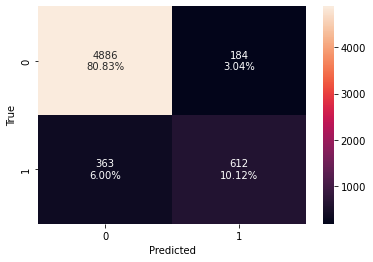

In [106]:
confusion_matrix_classification(lr, X_train, y_train)

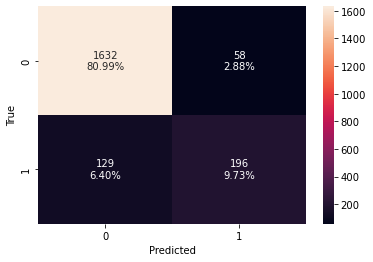

In [107]:
confusion_matrix_classification(lr, X_val, y_val)

##### Observation

The model is not overfitting but the recall score is so low. 

#### Decision Tree

In [108]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [109]:
d_tree_model_performance_train= classification_model_performance(dtree, X_train, y_train)
d_tree_model_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [110]:
d_tree_model_performance_val= classification_model_performance(dtree, X_val, y_val)
d_tree_model_performance_val

Accuracy  Recall  Precision    F1
0     0.886   0.606      0.659 0.631

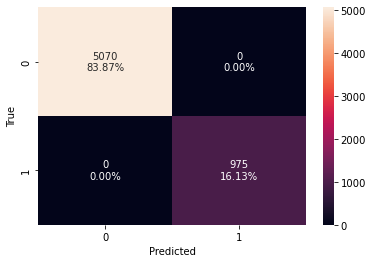

In [111]:
confusion_matrix_classification(dtree, X_train, y_train)

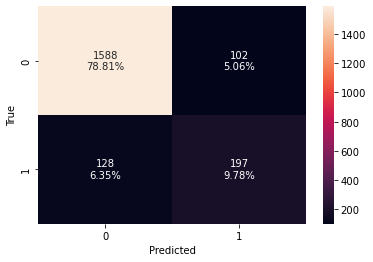

In [112]:
confusion_matrix_classification(dtree, X_val, y_val)

##### Observation

The model is overfitting; the model performs well on the train set but not on the validation set.

#### Bagging Classifier

In [113]:
bagging= BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [114]:
bagging_model_performance_train= classification_model_performance(bagging, X_train, y_train)
bagging_model_performance_train

Accuracy  Recall  Precision    F1
0     0.994   0.972      0.991 0.981

In [115]:
bagging_model_performance_val= classification_model_performance(bagging, X_val, y_val)
bagging_model_performance_val

Accuracy  Recall  Precision    F1
0     0.917   0.652      0.794 0.716

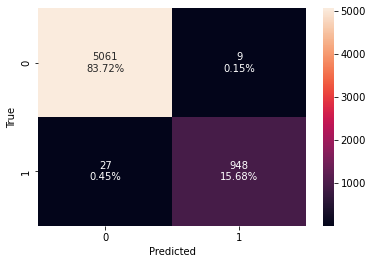

In [116]:
confusion_matrix_classification(bagging, X_train, y_train)

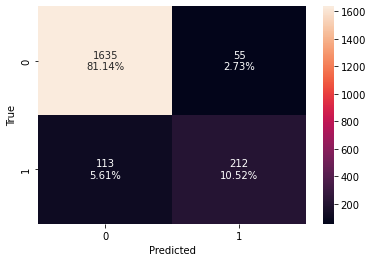

In [117]:
confusion_matrix_classification(bagging, X_val, y_val)

##### Observation

The model is overfitting, the recall score is very high for train set but not validation set.

#### Random Forest Model

In [118]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [119]:
random_forest_model_performance_train= classification_model_performance(rf, X_train, y_train)
random_forest_model_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [120]:
random_forest_model_performance_val= classification_model_performance(rf, X_val, y_val)
random_forest_model_performance_val

Accuracy  Recall  Precision    F1
0     0.934   0.683      0.884 0.771

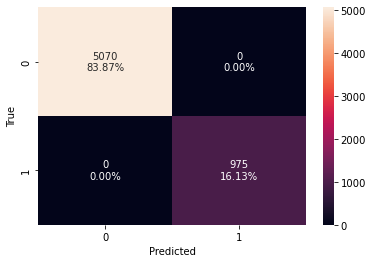

In [121]:
confusion_matrix_classification(rf, X_train, y_train)

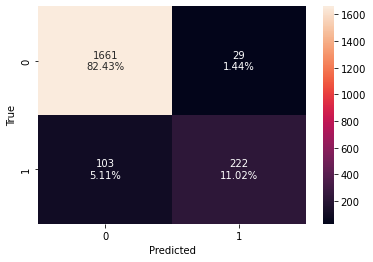

In [122]:
confusion_matrix_classification(rf, X_val, y_val)

##### Observation

The model is overfitting, it perform well on the train set but not on the val set, recall score is low on the val set.

### Boosting

#### AdaBoost Classifier

In [123]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [124]:
ada_boosting_model_performance_train= classification_model_performance(ada, X_train, y_train)
ada_boosting_model_performance_train

Accuracy  Recall  Precision    F1
0     0.921   0.681      0.797 0.735

In [125]:
ada_boosting_model_performance_val= classification_model_performance(ada, X_val, y_val)
ada_boosting_model_performance_val

Accuracy  Recall  Precision    F1
0     0.919   0.677      0.789 0.728

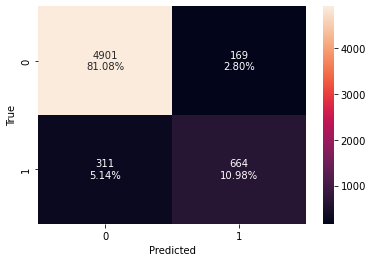

In [126]:
confusion_matrix_classification(ada, X_train, y_train)

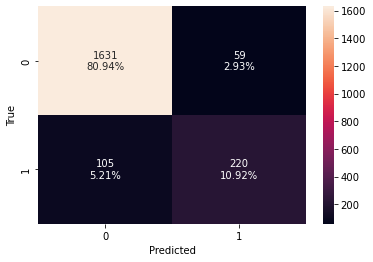

In [127]:
confusion_matrix_classification(ada, X_val, y_val)

##### Observation

The model is not overfit but recall scores are so low on train and val sets.

#### Gradient Boosting Classifier

In [128]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [129]:
gbc_model_performance_train= classification_model_performance(gbc, X_train, y_train)
gbc_model_performance_train

Accuracy  Recall  Precision    F1
0     0.940   0.741      0.868 0.799

In [130]:
gbc_model_performance_val= classification_model_performance(gbc, X_val, y_val)
gbc_model_performance_val

Accuracy  Recall  Precision    F1
0     0.935   0.717      0.857 0.781

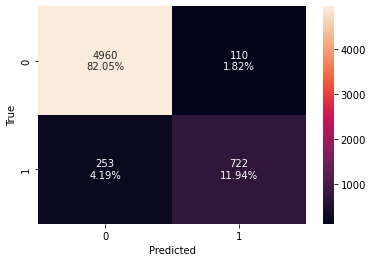

In [131]:
confusion_matrix_classification(gbc, X_train, y_train)

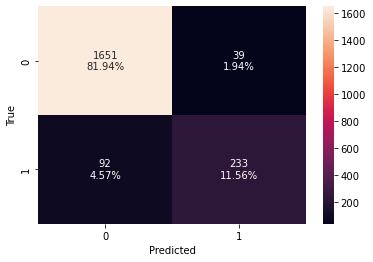

In [132]:
confusion_matrix_classification(gbc, X_val, y_val)

##### Observation

The model is not overfitting, but the recall score on the train and val sets are low.

#### XGBoost Classifier

In [133]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
xgb_model_performance_train= classification_model_performance(xgb, X_train, y_train)
xgb_model_performance_train

Accuracy  Recall  Precision    F1
0     1.000   0.998      1.000 0.999

In [135]:
xgb_model_performance_val= classification_model_performance(xgb, X_val, y_val)
xgb_model_performance_val

Accuracy  Recall  Precision    F1
0     0.940   0.760      0.852 0.803

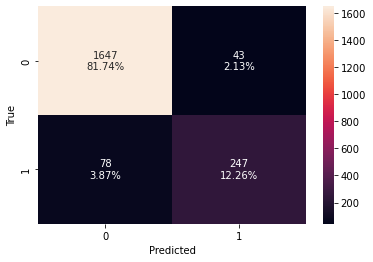

In [136]:
confusion_matrix_classification(xgb, X_val, y_val)

##### Observation

The model perfom well on train set but not perfect on the val set. The model is overfit.

### Oversampling train data using SMOTE

In [137]:
print("Before oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before oversampling, counts of label 'Yes': 975
Before oversampling, counts of label 'No': 5070 

After oversampling, counts of label 'Yes': 5070
After oversampling, counts of label 'No': 5070 

After oversampling, the shape of train_X: (10140, 53)
After oversampling, the shape of train_y: (10140,) 



#### Logistic Regression on oversampled data

In [138]:
lr_over = LogisticRegression(random_state=1)
lr_over.fit(X_train_over, y_train_over)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [139]:
lr_over_performance_train= classification_model_performance(lr_over, X_train_over, y_train_over)
lr_over_performance_train

Accuracy  Recall  Precision    F1
0     0.935   0.928      0.942 0.935

In [140]:
lr_over_performance_val= classification_model_performance(lr_over, X_val, y_val)
lr_over_performance_val

Accuracy  Recall  Precision    F1
0     0.894   0.634      0.687 0.659

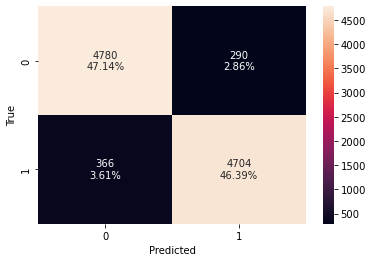

In [141]:
confusion_matrix_classification(lr_over, X_train_over, y_train_over)

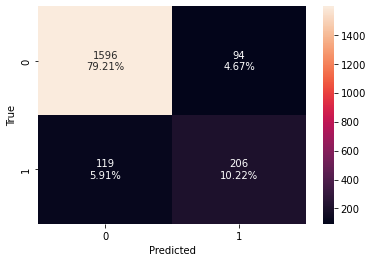

In [142]:
confusion_matrix_classification(lr_over, X_val, y_val)

##### Observation

The model is overfitting

#### Decision Tree on oversampled data

In [143]:
dtree_over=DecisionTreeClassifier(random_state=1)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [144]:
dtree_over_performance_train= classification_model_performance(dtree_over, X_train_over, y_train_over)
dtree_over_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [145]:
dtree_over_performance_val= classification_model_performance(dtree_over, X_val, y_val)
dtree_over_performance_val

Accuracy  Recall  Precision    F1
0     0.883   0.711      0.619 0.662

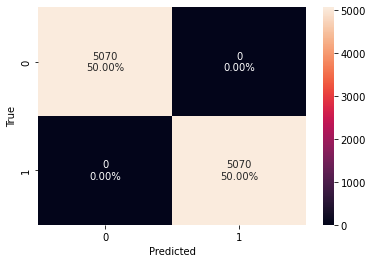

In [146]:
confusion_matrix_classification(dtree_over, X_train_over, y_train_over)

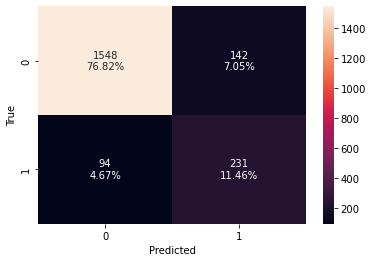

In [147]:
confusion_matrix_classification(dtree_over, X_val, y_val)

##### Observation

The model is overfitting

#### Bagging Classifier on oversampled data

In [148]:
bagging_over= BaggingClassifier(random_state=1)
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [149]:
bagging_over_performance_train= classification_model_performance(bagging_over, X_train_over, y_train_over)
bagging_over_performance_train

Accuracy  Recall  Precision    F1
0     0.996   0.994      0.997 0.996

In [150]:
bagging_over_performance_val= classification_model_performance(bagging_over, X_val, y_val)
bagging_over_performance_val

Accuracy  Recall  Precision    F1
0     0.918   0.726      0.756 0.741

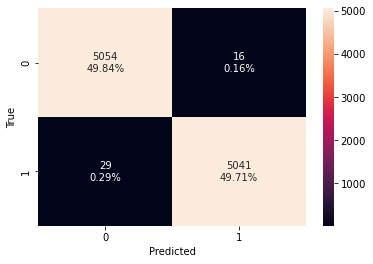

In [151]:
confusion_matrix_classification(bagging_over, X_train_over, y_train_over)

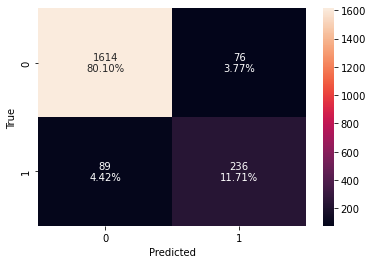

In [152]:
confusion_matrix_classification(bagging_over, X_val, y_val)

##### Observation

The recall score is low on val set, the model is overfitting

#### Random Forest on oversampled data

In [153]:
rf_over=RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [154]:
rf_over_performance_train= classification_model_performance(rf_over, X_train_over, y_train_over)
rf_over_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [155]:
rf_over_performance_val= classification_model_performance(rf_over, X_val, y_val)
rf_over_performance_val

Accuracy  Recall  Precision    F1
0     0.924   0.717      0.790 0.752

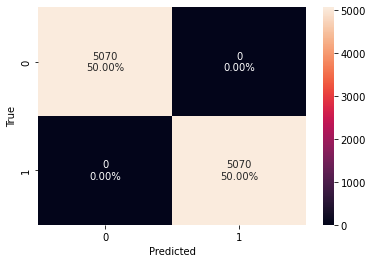

In [156]:
confusion_matrix_classification(rf_over, X_train_over, y_train_over)

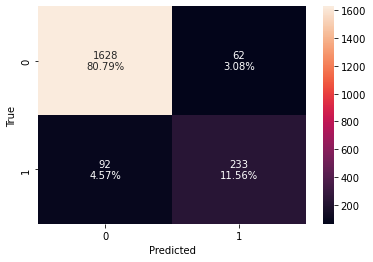

In [157]:
confusion_matrix_classification(rf_over, X_val, y_val)

##### Observation

The model is overfitting

#### AdaBoost Classifier on oversampled data

In [158]:
ada_over = AdaBoostClassifier(random_state=1)
ada_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [159]:
ada_over_performance_train= classification_model_performance(ada_over, X_train_over, y_train_over)
ada_over_performance_train

Accuracy  Recall  Precision    F1
0     0.939   0.945      0.933 0.939

In [160]:
ada_over_performance_val= classification_model_performance(ada_over, X_val, y_val)
ada_over_performance_val

Accuracy  Recall  Precision    F1
0     0.910   0.729      0.718 0.724

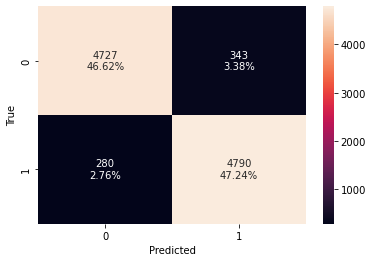

In [161]:
confusion_matrix_classification(ada_over, X_train_over, y_train_over)

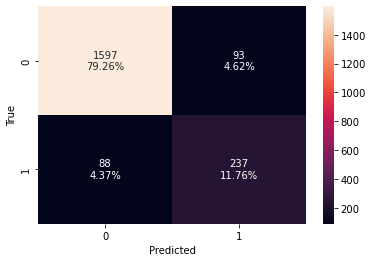

In [162]:
confusion_matrix_classification(ada_over, X_val, y_val)

The model is overfitting

#### Gradient Boosting Classifier on oversampled data

In [163]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [164]:
gbc_over_performance_train= classification_model_performance(gbc_over, X_train_over, y_train_over)
gbc_over_performance_train

Accuracy  Recall  Precision    F1
0     0.955   0.960      0.950 0.955

In [165]:
gbc_over_performance_val= classification_model_performance(gbc_over, X_val, y_val)
gbc_over_performance_val

Accuracy  Recall  Precision    F1
0     0.930   0.809      0.767 0.787

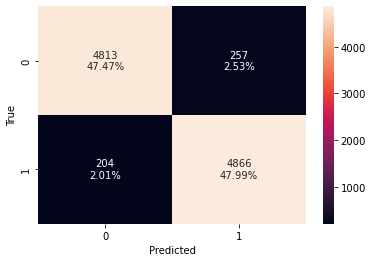

In [166]:
confusion_matrix_classification(gbc_over, X_train_over, y_train_over)

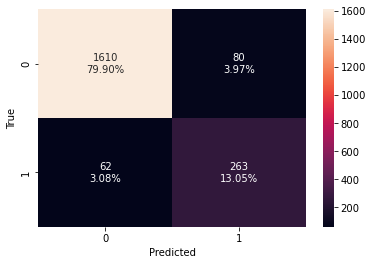

In [167]:
confusion_matrix_classification(gbc_over, X_val, y_val)

#### XGBoost Classifier on oversampled data

In [168]:
xgb_over = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_over.fit(X_train_over, y_train_over)

C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
xgb_over_performance_train= classification_model_performance(xgb_over, X_train_over, y_train_over)
xgb_over_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [170]:
xgb_over_performance_val= classification_model_performance(xgb_over, X_val, y_val)
xgb_over_performance_val

Accuracy  Recall  Precision    F1
0     0.942   0.794      0.838 0.815

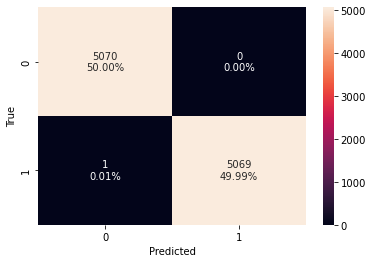

In [171]:
confusion_matrix_classification(xgb_over, X_train_over, y_train_over)

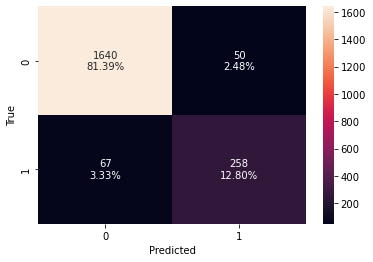

In [172]:
confusion_matrix_classification(xgb_over, X_val, y_val)

##### Observation

The oversampled models performed well on the train set but did not perform well on Val sets. Gradient Boosting Classifier on oversampled data is better than other models on oversampled data.

### Undersampling train data using RandomUnderSampler

In [173]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

#### Logistic Regression on undersampled data

In [174]:
lr_under = LogisticRegression(random_state=1)
lr_under.fit(X_train_under, y_train_under)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [175]:
lr_under_performance_train= classification_model_performance(lr_under, X_train_under, y_train_under)
lr_under_performance_train

Accuracy  Recall  Precision    F1
0     0.874   0.879      0.870 0.874

In [176]:
lr_under_performance_val= classification_model_performance(lr_under, X_val, y_val)
lr_under_performance_val

Accuracy  Recall  Precision    F1
0     0.856   0.874      0.532 0.661

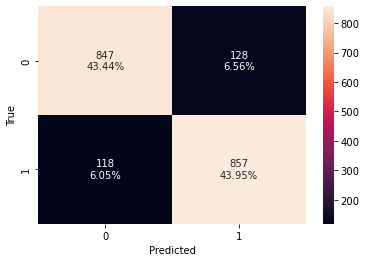

In [177]:
confusion_matrix_classification(lr_under, X_train_under, y_train_under)

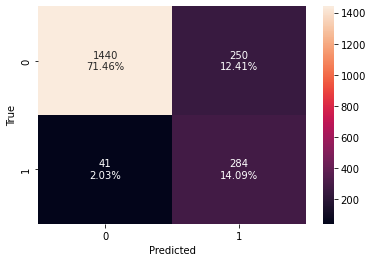

In [178]:
confusion_matrix_classification(lr_under, X_val, y_val)

The recall scores on the train and val sets are good but not perfect, and accuracy scores on the train and val sets are low.

#### Decision Tree on undersampled data

In [179]:
dtree_under=DecisionTreeClassifier(random_state=1)
dtree_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=1)

In [180]:
dtree_under_performance_train= classification_model_performance(dtree_under, X_train_under, y_train_under)
dtree_under_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [181]:
dtree_under_performance_val= classification_model_performance(dtree_under, X_val, y_val)
dtree_under_performance_val

Accuracy  Recall  Precision    F1
0     0.839   0.825      0.500 0.623

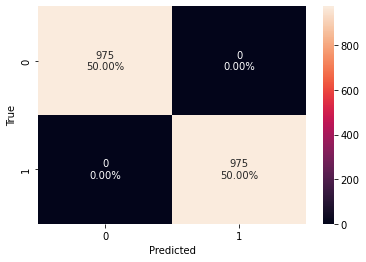

In [182]:
confusion_matrix_classification(dtree_under, X_train_under, y_train_under)

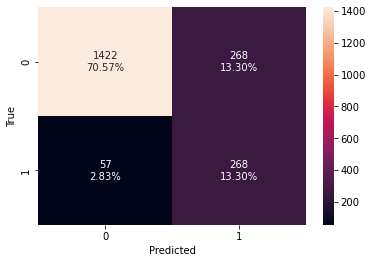

In [183]:
confusion_matrix_classification(dtree_under, X_val, y_val)

The model is overfitting.

#### Bagging Classifier on undersampled data

In [184]:
bagging_under= BaggingClassifier(random_state=1)
bagging_under.fit(X_train_under, y_train_under)

BaggingClassifier(random_state=1)

In [185]:
bagging_under_performance_train= classification_model_performance(bagging_under, X_train_under, y_train_under)
bagging_under_performance_train

Accuracy  Recall  Precision    F1
0     0.993   0.990      0.997 0.993

In [186]:
bagging_under_performance_val= classification_model_performance(bagging_under, X_val, y_val)
bagging_under_performance_val

Accuracy  Recall  Precision    F1
0     0.876   0.855      0.578 0.690

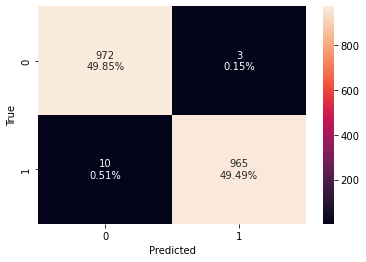

In [187]:
confusion_matrix_classification(bagging_under, X_train_under, y_train_under)

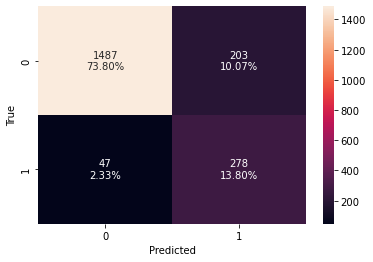

In [188]:
confusion_matrix_classification(bagging_under, X_val, y_val)

The recall score on the val set is low.

#### Random Forest on undersampled data

In [189]:
rf_under=RandomForestClassifier(random_state=1)
rf_under.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=1)

In [190]:
rf_under_performance_train= classification_model_performance(rf_under, X_train_under, y_train_under)
rf_under_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [191]:
rf_under_performance_val= classification_model_performance(rf_under, X_val, y_val)
rf_under_performance_val

Accuracy  Recall  Precision    F1
0     0.888   0.889      0.605 0.720

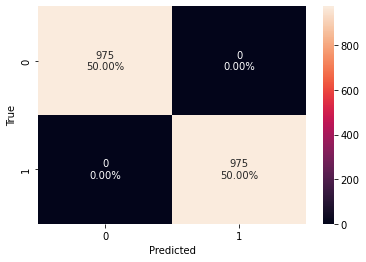

In [192]:
confusion_matrix_classification(rf_under, X_train_under, y_train_under)

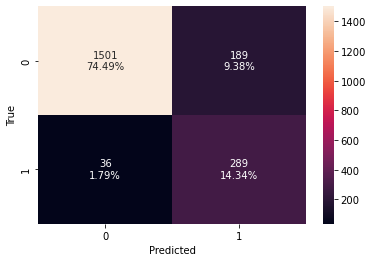

In [193]:
confusion_matrix_classification(rf_under, X_val, y_val)

The model performs well on the train set but not well on the val set.

#### AdaBoost Classifier on undersampled data

In [194]:
ada_under = AdaBoostClassifier(random_state=1)
ada_under.fit(X_train_under, y_train_under)

AdaBoostClassifier(random_state=1)

In [195]:
ada_under_performance_train= classification_model_performance(ada_under, X_train_under, y_train_under)
ada_under_performance_train

Accuracy  Recall  Precision    F1
0     0.889   0.889      0.888 0.889

In [196]:
ada_under_performance_val= classification_model_performance(ada_under, X_val, y_val)
ada_under_performance_val

Accuracy  Recall  Precision    F1
0     0.876   0.892      0.575 0.700

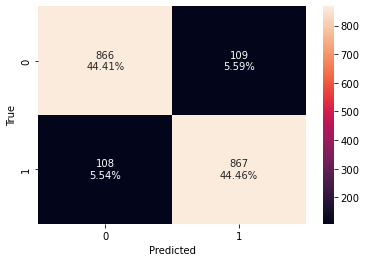

In [197]:
confusion_matrix_classification(ada_under, X_train_under, y_train_under)

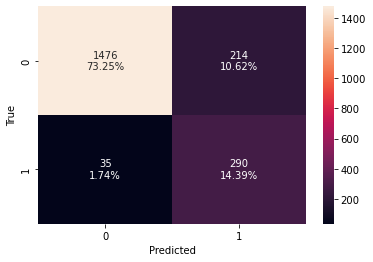

In [198]:
confusion_matrix_classification(ada_under, X_val, y_val)

The recall scores are good and the model is not overfitting but the accuracy scores are low.

#### Gradient Boosting Classifier on undersampled data

In [199]:
gbc_under = GradientBoostingClassifier(random_state=1)
gbc_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(random_state=1)

In [200]:
gbc_under_performance_train= classification_model_performance(gbc_under, X_train_under, y_train_under)
gbc_under_performance_train

Accuracy  Recall  Precision    F1
0     0.930   0.947      0.916 0.931

In [201]:
gbc_under_performance_val= classification_model_performance(gbc_under, X_val, y_val)
gbc_under_performance_val

Accuracy  Recall  Precision    F1
0     0.889   0.898      0.605 0.723

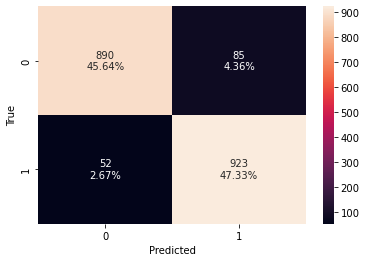

In [202]:
confusion_matrix_classification(gbc_under, X_train_under, y_train_under)

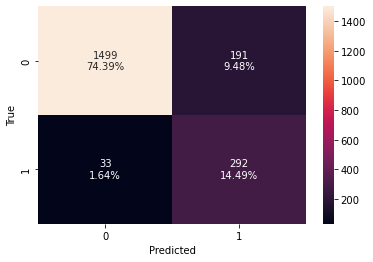

In [203]:
confusion_matrix_classification(gbc_under, X_val, y_val)

#### XGBoost Classifier on undersampled data

In [204]:
xgb_under = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_under.fit(X_train_under, y_train_under)

C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
xgb_under_performance_train= classification_model_performance(xgb_under, X_train_under, y_train_under)
xgb_under_performance_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [206]:
xgb_under_performance_val= classification_model_performance(xgb_under, X_val, y_val)
xgb_under_performance_val

Accuracy  Recall  Precision    F1
0     0.906   0.917      0.648 0.759

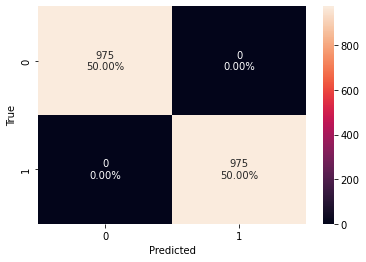

In [207]:
confusion_matrix_classification(xgb_under, X_train_under, y_train_under)

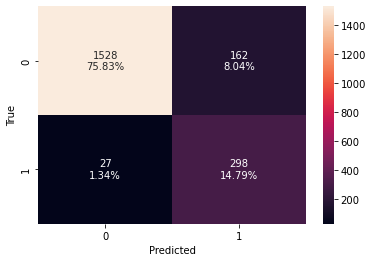

In [208]:
confusion_matrix_classification(xgb_under, X_val, y_val)

### Comparing The Models Performances

In [209]:
models_comp = pd.concat( [
    Log_reg_model_performance_train.T,
    Log_reg_model_performance_val.T,
    d_tree_model_performance_train.T,
    d_tree_model_performance_val.T,
    bagging_model_performance_train.T,
    bagging_model_performance_val.T,
    random_forest_model_performance_train.T,
    random_forest_model_performance_val.T,
    ada_boosting_model_performance_train.T,
    ada_boosting_model_performance_val.T,
    gbc_model_performance_train.T,
    gbc_model_performance_val.T,
    xgb_model_performance_train.T,
    xgb_model_performance_val.T,
    lr_over_performance_train.T,
    lr_over_performance_val.T,
    dtree_over_performance_train.T,
    dtree_over_performance_val.T,
    bagging_over_performance_train.T,
    bagging_over_performance_val.T,
    rf_over_performance_train.T,
    rf_over_performance_val.T,
    ada_over_performance_train.T,
    ada_over_performance_val.T,
    gbc_over_performance_train.T,
    gbc_over_performance_val.T,
    xgb_over_performance_train.T,
    xgb_over_performance_val.T,
    lr_under_performance_train.T,
    lr_under_performance_val.T,
    dtree_under_performance_train.T,
    dtree_under_performance_val.T,
    bagging_under_performance_train.T,
    bagging_under_performance_val.T,
    rf_under_performance_train.T,
    rf_under_performance_val.T,
    ada_under_performance_train.T,
    ada_under_performance_val.T,
    gbc_under_performance_train.T,
    gbc_under_performance_val.T,
    xgb_under_performance_train.T,
    xgb_under_performance_val.T], axis=1)
    
models_comp.columns = [
    "Logistic Regression Train",
    "Logistic Regression Val",
    "Decision Tree Train",
    "Decision Tree Val",
    "Bagging Classifier Train",
    "Bagging Classifier Val",
    "Random Forest Model Train",
    "Random Forest Model Val",
    "AdaBoost Classifier Train",
    "AdaBoost Classifier Val",
    "Gradient Boosting Train",
    "Gradient Boosting Val",
    "XGBoost Classifier Train",
    "XGBoost Classifier Val",
    "Logistic Regression on oversampled Train",
    "Logistic Regression on oversampled Val",
    "Decision Tree on oversampled Train",
    "Decision Tree on oversampled Val",
    "Bagging Classifier on oversampled Train",
    "Bagging Classifier on oversampled Val",
    "Random Forest on oversampled Train",
    "Random Forest on oversampled Val",
    "AdaBoost Classifier on oversampled Train",
    "AdaBoost Classifier on oversampled Val",
    "Gradient Boosting Classifier on oversampled Train",
    "Gradient Boosting Classifier on oversampled Val",
    "XGBoost Classifier on oversampled Train",
    "XGBoost Classifier on oversampled Val",
    "Logistic Regression on undersampled Train",
    "Logistic Regression on undersampled Val",
    "Decision Tree on undersampled Train",
    "Decision Tree on undersampled Val",
    "Bagging Classifier on undersampled Train",
    "Bagging Classifier on undersampled Val",
    "Random Forest on undersampled Train",
    "Random Forest on undersampled Val",
    "AdaBoost Classifier on undersampled Train",
    "AdaBoost Classifier on undersampled Val",
    "Gradient Boosting Classifier on undersampled Train",
    "Gradient Boosting Classifier on undersampled Val", 
    "XGBoost Classifier on undersampled Train",
    "XGBoost Classifier on undersampled Val"]

In [210]:
models_comp

Logistic Regression Train  Logistic Regression Val  \
Accuracy                       0.910                    0.907   
Recall                         0.628                    0.603   
Precision                      0.769                    0.772   
F1                             0.691                    0.677   

           Decision Tree Train  Decision Tree Val  Bagging Classifier Train  \
Accuracy                 1.000              0.886                     0.994   
Recall                   1.000              0.606                     0.972   
Precision                1.000              0.659                     0.991   
F1                       1.000              0.631                     0.981   

           Bagging Classifier Val  Random Forest Model Train  \
Accuracy                    0.917                      1.000   
Recall                      0.652                      1.000   
Precision                   0.794                      1.000   
F1                          0.716                      1.000   

           Random Forest Model Val  AdaBoost Classifier Train  \
Accuracy                     0.934                      0.921   
Recall                       0.683                      0.681   
Precision                    0.884                      0.797   
F1                           0.771                      0.735   

           AdaBoost Classifier Val  Gradient Boosting Train  \
Accuracy                     0.919                    0.940   
Recall                       0.677                    0.741   
Precision                    0.789                    0.868   
F1                           0.728                    0.799   

           Gradient Boosting Val  XGBoost Classifier Train  \
Accuracy                   0.935                     1.000   
Recall                     0.717                     0.998   
Precision                  0.857                     1.000   
F1                         0.781                     0.999   

           XGBoost Classifier Val  Logistic Regression on oversampled Train  \
Accuracy                    0.940                                     0.935   
Recall                      0.760                                     0.928   
Precision                   0.852                                     0.942   
F1                          0.803                                     0.935   

           Logistic Regression on oversampled Val  \
Accuracy                                    0.894   
Recall                                      0.634   
Precision                                   0.687   
F1                                          0.659   

           Decision Tree on oversampled Train  \
Accuracy                                1.000   
Recall                                  1.000   
Precision                               1.000   
F1                                      1.000   

           Decision Tree on oversampled Val  \
Accuracy                              0.883   
Recall                                0.711   
Precision                             0.619   
F1                                    0.662   

           Bagging Classifier on oversampled Train  \
Accuracy                                     0.996   
Recall                                       0.994   
Precision                                    0.997   
F1                                           0.996   

           Bagging Classifier on oversampled Val  \
Accuracy                                   0.918   
Recall                                     0.726   
Precision                                  0.756   
F1                                         0.741   

           Random Forest on oversampled Train  \
Accuracy                                1.000   
Recall                                  1.000   
Precision                               1.000   
F1                                      1.000   

           Random Forest on oversampled Val  \
Accuracy                              0.924   

##### Observation

Gradient Boosting Classifier on oversampled, XGBoost Classifier on undersampled, Gradient Boosting Classifier on undersampled models can tune to improve the performance of the models. 

### Hyperparameter tuning using random search

#### Gradient Boosting Classifier on undersampled data Tuned

In [211]:
model_gbc_under = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [50,100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

scorer = metrics.make_scorer(metrics.recall_score)

gbc_tuned1 =RandomizedSearchCV(estimator=model_gbc_under, param_distributions=parameters, n_iter=50, scoring=scorer, cv=5, random_state=1)
gbc_tuned1.fit(X_train_under, y_train_under)


print("Best parameters are {} with CV score={}:" .format(gbc_tuned1.best_params_,gbc_tuned1.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 250, 'max_features': 0.8} with CV score=0.914871794871795:


In [212]:
gbc_under_tuned_performance_train= classification_model_performance(gbc_tuned1, X_train_under, y_train_under)
gbc_under_tuned_performance_train

Accuracy  Recall  Precision    F1
0     0.972   0.979      0.965 0.972

In [213]:
gbc_under_tuned_performance_val= classification_model_performance(gbc_tuned1, X_val, y_val)
gbc_under_tuned_performance_val

Accuracy  Recall  Precision    F1
0     0.905   0.908      0.647 0.755

#### XGBoost Classifier on undersampled Data Tuned

In [214]:
model_xgb_under = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,50),
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1)
          }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model_xgb_under, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 5} with CV score=0.9251630549126869:


C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [215]:
xgb_under_tuned_performance_train= classification_model_performance(xgb_tuned1, X_train_under, y_train_under)
xgb_under_tuned_performance_train

Accuracy  Recall  Precision    F1
0     0.744   0.925      0.679 0.783

In [216]:
xgb_under_tuned_performance_val= classification_model_performance(xgb_tuned1, X_val, y_val)
xgb_under_tuned_performance_val

Accuracy  Recall  Precision    F1
0     0.594   0.917      0.273 0.421

### Gradient Boosting Classifier on oversampled data Tuned

In [217]:
model = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [50,100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

scorer = metrics.make_scorer(metrics.recall_score)

gbc_tuned =RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=50, scoring=scorer, cv=5, random_state=1)
gbc_tuned.fit(X_train_over, y_train_over)


print("Best parameters are {} with CV score={}:" .format(gbc_tuned.best_params_,gbc_tuned.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 50, 'max_features': 0.8} with CV score=0.9236686390532544:


In [218]:
gbc_over_tuned_performance_train= classification_model_performance(gbc_tuned, X_train_over, y_train_over)
gbc_over_tuned_performance_train

Accuracy  Recall  Precision    F1
0     0.936   0.951      0.922 0.937

In [219]:
gbc_over_tuned_performance_val= classification_model_performance(gbc_tuned, X_val, y_val)
gbc_over_tuned_performance_val

Accuracy  Recall  Precision    F1
0     0.914   0.815      0.699 0.753

Select the Gradient Boosting Classifier on undersampled data Tuned as a final model because this model is not overfitting, has a higher recall score on the train and validation sets, and has high accuracy score. The recall score is the evaluation metric of the model, but we also look at the other metrics such as the accuracy score to decide the final model because if the recall score is so high and the accuracy score is so low that means the model does not detect the attrited and existing customers. Therefore, the  Gradient Boosting Classifier on undersampled data Tuned model has high recall and high accuracy scores. Before looking at the importance of the features of the model, that let's check the model performance on the test set

In [220]:
gbc_under_tuned_performance_test= classification_model_performance(gbc_tuned1, X_test, y_test)
gbc_under_tuned_performance_test

Accuracy  Recall  Precision    F1
0     0.909   0.914      0.656 0.763

In [221]:
top_params=gbc_tuned1.best_params_
top_params


{'subsample': 0.9, 'n_estimators': 250, 'max_features': 0.8}

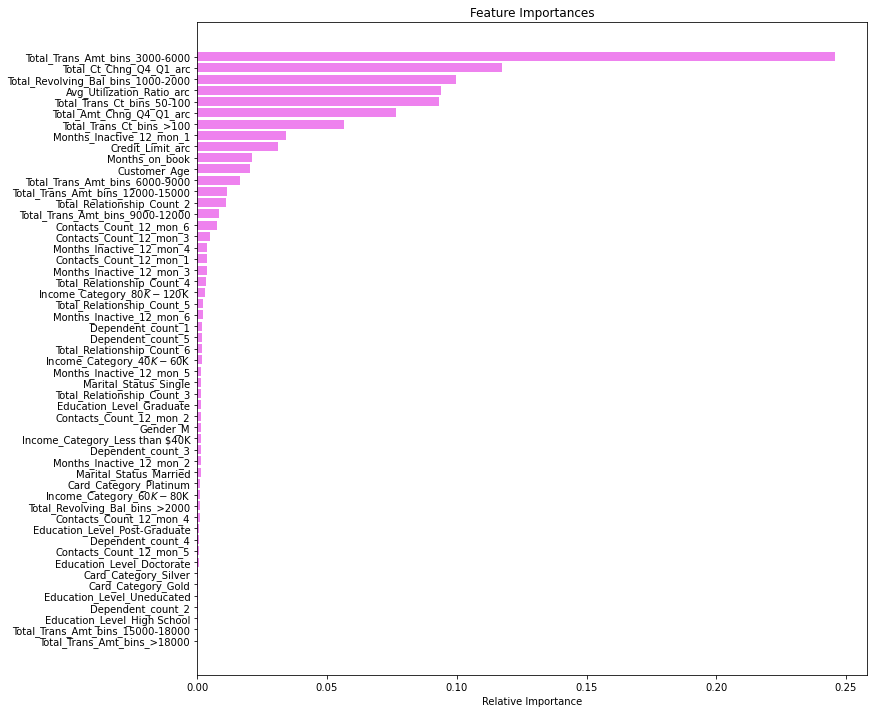

In [222]:
feature_names = X_train.columns
gbm_model = GradientBoostingClassifier(random_state=1, subsample= 0.9, n_estimators = 250, max_features = 0.8)
gbm_model.fit(X_train_under,y_train_under)
importances=gbm_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observation

Gradient Boosting Classifier on undersampled data Tuned is the best model among the other models, so this model can be used as a final model. The model also give a good performance on the test set. Total_Trans_Amt_bins_3000-6000, Total_Ct_Chng_Q4_Q1_arc, and Total_Revolving_Bal_bins_1000-2000 are the most important three features in the model.

### Pipeline for the Model

In [223]:
numerical_features = ['Customer_Age', 'Months_on_book', 'Credit_Limit_arc',
       'Total_Amt_Chng_Q4_Q1_arc', 'Total_Ct_Chng_Q4_Q1_arc',
       'Avg_Utilization_Ratio_arc']
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


In [224]:
categorical_features = ['Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Trans_Ct_bins','Total_Revolving_Bal_bins','Total_Trans_Amt_bins']
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [225]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

In [226]:
X = df2.drop("Attrition_Flag", axis=1)
Y = df2["Attrition_Flag"]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7052, 18) (3023, 18)


In [228]:
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
             GradientBoostingClassifier(
                random_state = 1,
                subsample = 0.9,
                n_estimators = 250, 
                max_features = 0.8
            ),
        ),
    ]
)


In [229]:
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit_arc',
                                                   'Total_Amt_Chng_Q4_Q1_arc',
                                                   'Total_Ct_Chng_Q4_Q1_arc',
                                                   'Avg_Utilization_Ratio_arc']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_

### Conclusion and Business Recommendations